<a href="https://colab.research.google.com/github/kshitijzutshi/Customer-Churn-Prediction-2020/blob/main/Customer_Churn_Prediction_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Abstract

Customer churn, also known as attrition, occurs when a customer stops doing business with a company. Understanding and detecting churn is the first step to retaining these customers and improving the company’s offerings.

The task is to perform a churn analysis on a [Kaggle competition - Customer Churn Prediction 2020](https://www.kaggle.com/c/customer-churn-prediction-2020/overview) to predict whether a customer will change telco provider.

In order to perform the task, first the EDA (using Pandas profiling/matplotlib) and Feature Engineering was done to get a sense of the data. In order to do a comparative analysis and optimization, Three algorithms were chosen for the classification problem 
1. Support Vector Classifier
2. Random Forest Classifier
3. XGBoost classifier

Based on following performance evaluation, it was found that XGBoost performed best for the given data with a Kaggle **mean leaderboard submission score of 0.965** which would land the model in **13th Position in leaderboard**.



### 1. Installing dependencies

In [413]:
!pip install fitter

In [414]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


### 1.1 Importing necessary Libraries

In [415]:
import pandas as pd
import seaborn as sns
from numpy import unique
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from pandas.plotting import scatter_matrix
# Building a model imports
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report, cohen_kappa_score
from imblearn.over_sampling import SMOTE
from fitter import Fitter, get_common_distributions, get_distributions
from matplotlib import pyplot
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve

### 2. Loading the Dataset

In [416]:
# Loading the train & test dataset

train = pd.read_csv('https://raw.githubusercontent.com/kshitijzutshi/Customer-Churn-Prediction-2020/main/dataset/train.csv')
df_train = pd.DataFrame(train)

test = pd.read_csv('https://raw.githubusercontent.com/kshitijzutshi/Customer-Churn-Prediction-2020/main/dataset/test.csv')
df_test = pd.DataFrame(test)


### 3. Summarizing the dataset

In this step we are going to take a look at the data a few different ways:

   1. Dimensions of the dataset.
   2. Peek at the data itself.
   3. Statistical summary of all attributes.
   


### 3.1 Dimensions of the Dataset

- Train dataset has 4250 instances and 20 attributes

- Test dataset has 750 instances and 20 attributes

In [417]:
print(df_train.shape)
print(df_test.shape)

(4250, 20)
(750, 20)


### 3.2 Peak at the Data itself

In [418]:
df_train.sample(5)

state  account_length  ... number_customer_service_calls churn
319     OH              84  ...                             2    no
0       OH             107  ...                             1    no
3171    MO              87  ...                             4    no
2002    FL             105  ...                             2   yes
3739    ID              67  ...                             3    no

[5 rows x 20 columns]

Seeing the target variable, we can say that the dataset is imbalanced as we dont have even number of Churn and No Churn data. ie., 

0 -- No Churn data -- 85.9%

1 -- Churn data -- 14%

In [419]:
df_train.churn.value_counts()

no     3652
yes     598
Name: churn, dtype: int64

### 3.3 Statistical and Info summary of attributes

### Dataset Description

The training dataset contains **4250 samples**. Each sample contains **19 features and 1 boolean variable "churn"** which indicates the class of the sample. 

The 19 input features and 1 target variable are:




```

state , string  ->  2-letter code of the US state of customer residence

account_length, numerical -> Number of months the customer has been with the current telco provider

area_code, string="area_code_AAA" where AAA = 3 digit area code.
    
international_plan, (yes/no) -> The customer has international plan.
    
voice_mail_plan, (yes/no) -> The customer has voice mail plan.
    
number_vmail_messages, numerical. Number of voice-mail messages.
    
total_day_minutes", numerical. Total minutes of day calls.
    
total_day_calls", numerical. Total minutes of day calls.

"total_day_charge", numerical. Total charge of day calls.

"total_eve_minutes", numerical. Total minutes of evening calls.

"total_eve_calls", numerical. Total number of evening calls.

"total_eve_charge", numerical. Total charge of evening calls.

"total_night_minutes", numerical. Total minutes of night calls.

"total_night_calls", numerical. Total number of night calls.

"total_night_charge", numerical. Total charge of night calls.

"total_intl_minutes", numerical. Total minutes of international calls.

"total_intl_calls", numerical. Total number of international calls.

"total_intl_charge", numerical. Total charge of international calls

"number_customer_service_calls", numerical. Number of calls to customer service

"churn", (yes/no). Customer churn - target variable.

```


    







In [420]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [421]:
df_train.describe()

account_length  ...  number_customer_service_calls
count     4250.000000  ...                    4250.000000
mean       100.236235  ...                       1.559059
std         39.698401  ...                       1.311434
min          1.000000  ...                       0.000000
25%         73.000000  ...                       1.000000
50%        100.000000  ...                       1.000000
75%        127.000000  ...                       2.000000
max        243.000000  ...                       9.000000

[8 rows x 15 columns]

Things to note from describe data:

So, does the range make sense?

- We can see from the describe statistics that the numerical values have range that makes sense for total day/eve/night charge but international charge JUST DOSENT MAKE SENSE. Range being the difference between the largest and smallest observations in the sample, Its too low to be correct.

- comparing between total day minutes and total night minutes, the median and 75th percentile are slightly higher
- The Standard deviations of total day/eve/night minutes are >50 meaning that the data is much more spread out from the mean.
- Total international minutes have values that are very small, suggesting that the company probably has poor service for international/ customers dont use their service for international calls.
- There is atleast 1 customer service call made on average by the user.

### 4. Data preprocessing

Here we handle - 

- Categorical variables
- Null and unique check

##### For **State**, we can make it a category and have a mapped list of state name and its assigned code.

In [422]:
df_train.state = df_train.state.astype('category')
df_test.state = df_test.state.astype('category')

In [423]:
dict[enumerate(df_train['state'].cat.categories )]
dict[enumerate(df_test['state'].cat.categories )]

KeyError: ignored

#### To show the distribution of the independent features using **Histogram**, we need to assign codes to categorical variables in dataset.

Since areacode is a **nominal** **variable**, ie., it dosent have an order to make sense, we simply need to convert the text values to numeric data for our model to use the coloumn.

In [424]:
df_train.state = pd.Categorical(df_train.state).codes

dummy_columns = pd.get_dummies(df_train.area_code, prefix='area_code')

# axis{0/’index’, 1/’columns’}, default 0 -> The axis to concatenate along.
df_train = pd.concat([df_train.drop(columns='area_code'), dummy_columns], axis=1)

# dummy_columns_state = pd.get_dummies(df_train.state, prefix='state')
#   # axis{0/’index’, 1/’columns’}, default 0 -> The axis to concatenate along.
# df_train = pd.concat([df_train.drop(columns='state'), dummy_columns_state], axis=1)

df_train.international_plan = pd.Categorical(df_train.international_plan).codes
df_train.voice_mail_plan = pd.Categorical(df_train.voice_mail_plan).codes
df_train.churn = pd.Categorical(df_train.churn).codes


df_test.state = pd.Categorical(df_test.state).codes

dummy_columns = pd.get_dummies(df_test.area_code, prefix='area_code')
df_test = pd.concat([df_test.drop(columns='area_code'), dummy_columns], axis=1)
df_test.international_plan = pd.Categorical(df_test.international_plan).codes
df_test.voice_mail_plan = pd.Categorical(df_test.voice_mail_plan).codes
# drop the ID col in test dataset
# df_test.drop(columns='id', axis=1, inplace=True)

In [425]:
df_test.head()

id  state  ...  area_code_area_code_415  area_code_area_code_510
0   1     16  ...                        1                        0
1   2      1  ...                        0                        1
2   3     12  ...                        1                        0
3   4     46  ...                        0                        1
4   5     29  ...                        1                        0

[5 rows x 22 columns]

In [426]:
df_train.head()

state  account_length  ...  area_code_area_code_415  area_code_area_code_510
0     35             107  ...                        1                        0
1     31             137  ...                        1                        0
2     35              84  ...                        0                        0
3     36              75  ...                        1                        0
4     19             121  ...                        0                        1

[5 rows x 22 columns]

As we can see, there are no null values in train or test dataset.

In [427]:
# Check for null values in train and test sets
df_train.isna().sum()


# is_NaN = df_train.isnull()

# row_has_NaN = is_NaN.any(axis=1)

# rows_with_NaN = df_train[row_has_NaN]
# rows_with_NaN.head()

state                            0
account_length                   0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
area_code_area_code_408          0
area_code_area_code_415          0
area_code_area_code_510          0
dtype: int64

In [428]:
# Check for null values in train and test sets
df_test.isna().sum()

id                               0
state                            0
account_length                   0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
area_code_area_code_408          0
area_code_area_code_415          0
area_code_area_code_510          0
dtype: int64

As we can see, there are many unique values in numeric coloumn data and a couple of unique values for categorical variables (as it should be)

In [429]:
# Checking number of unique values in each column
df_train.nunique()

state                              51
account_length                    215
international_plan                  2
voice_mail_plan                     2
number_vmail_messages              46
total_day_minutes                1843
total_day_calls                   120
total_day_charge                 1843
total_eve_minutes                1773
total_eve_calls                   123
total_eve_charge                 1572
total_night_minutes              1757
total_night_calls                 128
total_night_charge                992
total_intl_minutes                168
total_intl_calls                   21
total_intl_charge                 168
number_customer_service_calls      10
churn                               2
area_code_area_code_408             2
area_code_area_code_415             2
area_code_area_code_510             2
dtype: int64

### 5. Data Visualization

We now have a basic idea about the data. We need to extend that with some visualizations.

We are going to look at two types of plots:

  - **Univariate** **plots** to better understand each attribute.

  - **Multivariate** **plots** to better understand the relationships between attributes.




In [430]:
# from pandas_profiling import ProfileReport
# profile = ProfileReport(df_train)
# profile.to_notebook_iframe()
# # to save the file
# churn_report = profile.to_file(output_file="churn_report.html")

#### 5.1 Univariate Plots

As we can see the dataset looks imbalanced. 

Solution : 

The library imblearn has a class named **imblearn.over_sampling.SMOTE** which performs **over-sampling using SMOTE (Synthetic Minority Over-sampling Technique)**. This is done after the train-test-split.


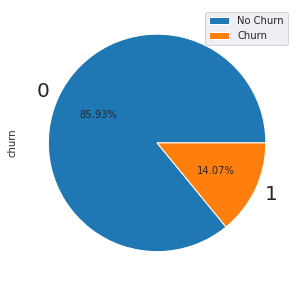

In [431]:
# Inspecting the Dataset
# The pie plot is for getting an overview of total number of churned/not churned customers
# The autopct set at 2 decimal to get a precise idea of the segregation of target values.
plot = df_train.churn.value_counts().plot.pie(y='churn', figsize=(5, 5), autopct='%.2f%%').legend(['No Churn', 'Churn'], loc="best")

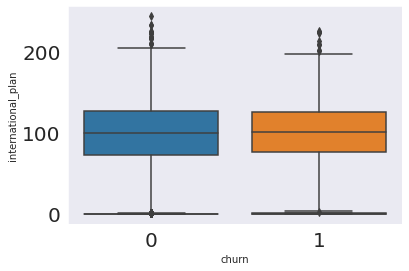

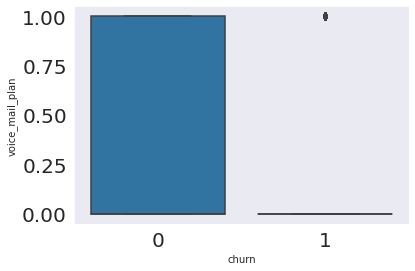

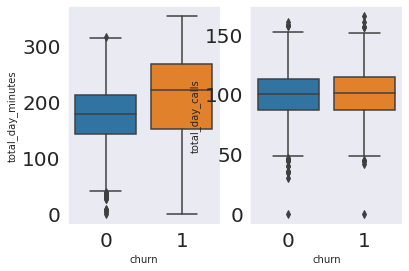

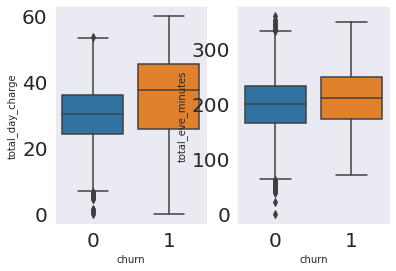

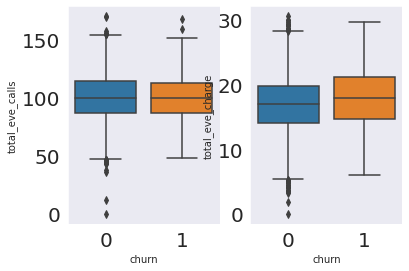

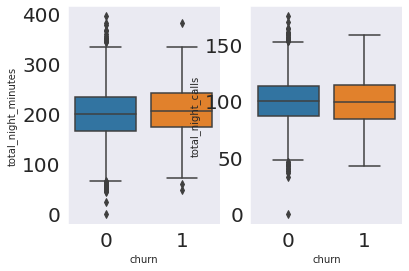

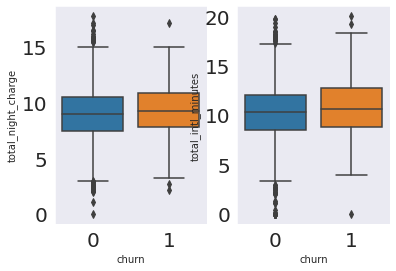

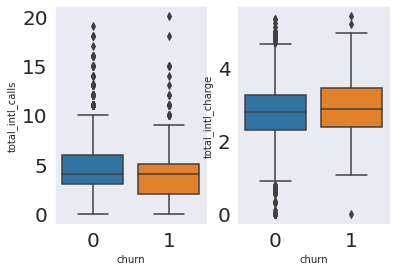

In [432]:
# To organize our plots and keep them in the same figure
# reference - https://seaborn.pydata.org/generated/seaborn.boxplot.html
# fig, axs = plt.subplots(ncols=2)
# First box plot of state vs churn
# sns.boxplot(x='churn', y='state', data=df_train, ax=axs[0])
# Second box plot for account length vs churn
sns.boxplot(x='churn', y='account_length', data=df_train)

# fig, axs = plt.subplots(ncols=2)
# Third box plot for area code vs churn
# sns.boxplot(x='churn', y='area_code', data=df_train, ax=axs[0])
# Fourth box plot for international plan vs churn
sns.boxplot(x='churn', y='international_plan', data=df_train)

fig, axs = plt.subplots(ncols=1)
# Third box plot for voice_mail_plan vs churn
sns.boxplot(x='churn', y='voice_mail_plan', data=df_train)
# Fourth box plot for number_vmail_messages vs churn
# sns.boxplot(x='churn', y='number_vmail_messages', data=df_train, ax=axs[1])

fig, axs = plt.subplots(ncols=2)
# Third box plot for total_day_messages vs churn
sns.boxplot(x='churn', y='total_day_minutes', data=df_train, ax=axs[0])
print('\n')
# Fourth box plot for total_day_calls vs churn
sns.boxplot(x='churn', y='total_day_calls', data=df_train, ax=axs[1])

fig, axs = plt.subplots(ncols=2)
# Third box plot for total_day_charge vs churn
sns.boxplot(x='churn', y='total_day_charge', data=df_train, ax=axs[0])
# Fourth box plot for total_eve_minutes vs churn
sns.boxplot(x='churn', y='total_eve_minutes', data=df_train, ax=axs[1])

fig, axs = plt.subplots(ncols=2)
# Third box plot for total_eve_calls vs churn
sns.boxplot(x='churn', y='total_eve_calls', data=df_train, ax=axs[0])
# Fourth box plot for total_eve_charge vs churn
sns.boxplot(x='churn', y='total_eve_charge', data=df_train, ax=axs[1])

fig, axs = plt.subplots(ncols=2)
# Third box plot for total_night_minutes vs churn
sns.boxplot(x='churn', y='total_night_minutes', data=df_train, ax=axs[0])
# Fourth box plot for total_night_calls vs churn
sns.boxplot(x='churn', y='total_night_calls', data=df_train, ax=axs[1])

fig, axs = plt.subplots(ncols=2)
# Third box plot for total_night_charge vs churn
sns.boxplot(x='churn', y='total_night_charge', data=df_train, ax=axs[0])
# Fourth box plot for total_intl_minutes vs churn
sns.boxplot(x='churn', y='total_intl_minutes', data=df_train, ax=axs[1])

fig, axs = plt.subplots(ncols=2)
# Third box plot for total_intl_calls vs churn
sns.boxplot(x='churn', y='total_intl_calls', data=df_train, ax=axs[0])
# Fourth box plot for total_intl_charge vs churn
sns.boxplot(x='churn', y='total_intl_charge', data=df_train, ax=axs[1])

# fig, axs = plt.subplots(ncols=1)
# Third box plot for number_customer_service_calls vs churn
# sns.boxplot(x='churn', y='number_customer_service_calls', data=df_train, ax=axs[0])


# this prevents plots from overlapping
# plt.tight_layout()
plt.subplots_adjust(hspace = 1)

We can also create a histogram of each input variable to get an idea of the distribution.

By the looks of it, the attributes are all normally distributed, this can be further examined using **Fitter function** to get the actual distribution type of each attribute.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbf1812b9d0>,
      dtype=object)

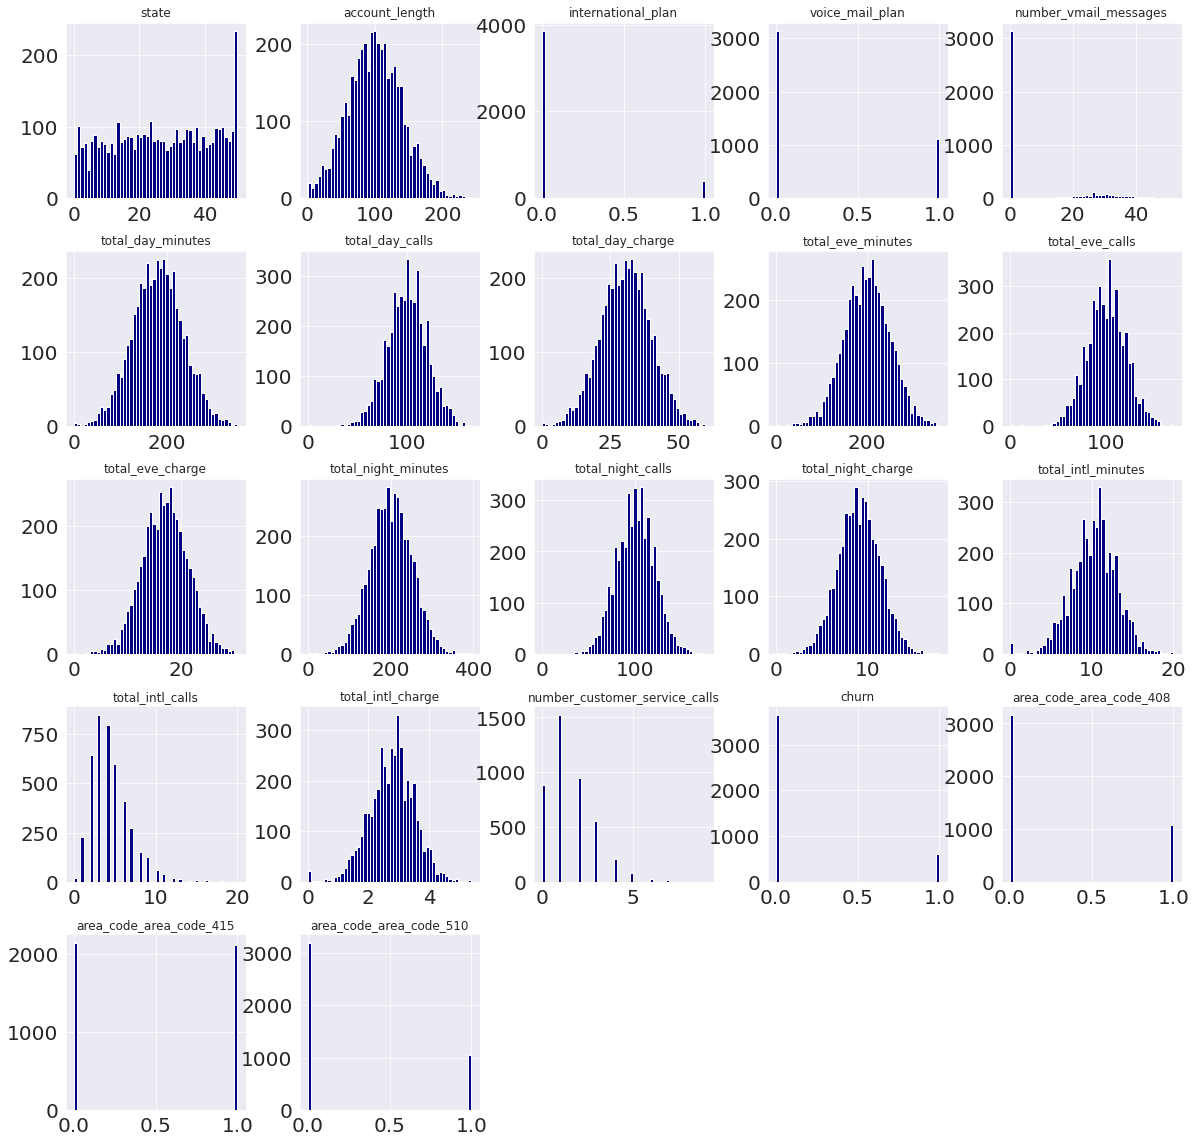

In [433]:
sns.set_style('dark')
df_train.hist(bins=50,figsize=(20,20),color='navy')

### Getting best fitting distribution for the Input features:

For the **account length feature**, the best fitting ditribution is **Normal Distribution** based on least sum of square error.

sumsquare_error          aic           bic  kl_div
norm            0.000184  1263.803790 -72034.848539     inf
gamma           0.000185  1252.351531 -72022.770002     inf
beta            0.000186  1262.911986 -71990.829704     inf
burr            0.000197  1241.322073 -71726.130831     inf
lognorm         0.008588  1477.875788 -55701.353144     inf

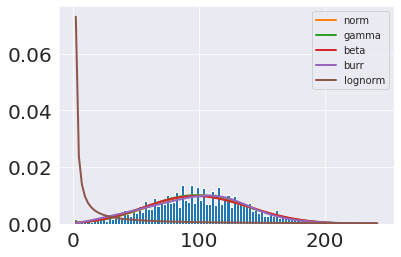

In [434]:
f = Fitter(df_train.account_length,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()

f.summary()

sumsquare_error          aic           bic  kl_div
gamma           0.000020  1341.439176 -81492.621071     inf
norm            0.000020  1339.277201 -81498.919969     inf
beta            0.000020  1345.821552 -81462.496608     inf
burr            0.000096  1415.003837 -74802.467771     inf
lognorm         0.004135  1585.306168 -58806.932463     inf

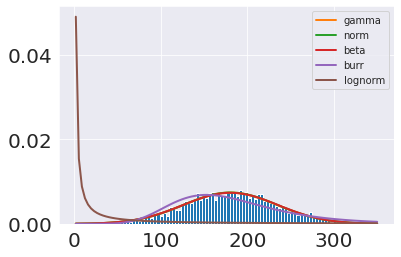

In [435]:
# total day minutes is also normal distribution
f = Fitter(df_train.total_day_minutes,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()

f.summary()

sumsquare_error          aic           bic  kl_div
beta            0.000792  1404.809527 -65823.975043     inf
norm            0.000792  1438.150154 -65837.919803     inf
lognorm         0.000794  1456.792319 -65818.114521     inf
gamma           0.000799  1467.606969 -65793.156413     inf
burr            0.001350  2354.461967 -63556.398837     inf

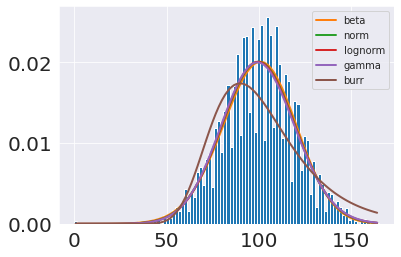

In [436]:
# total day calls is a normal distribution
f = Fitter(df_train.total_day_calls,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()

f.summary()

sumsquare_error         aic           bic  kl_div
gamma           0.000672  987.079447 -66532.705802     inf
norm            0.000672  984.941774 -66538.903169     inf
beta            0.000675  991.482038 -66503.121575     inf
lognorm         0.000677  987.902485 -66495.555705     inf
burr            0.001031  966.718620 -64701.159897     inf

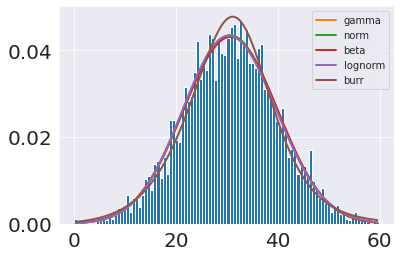

In [437]:
# total day charge is also a normal distribution
f = Fitter(df_train.total_day_charge,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()

f.summary()

sumsquare_error          aic           bic  kl_div
norm            0.000020  1413.966908 -81500.657288     inf
gamma           0.000020  1419.763744 -81488.867246     inf
beta            0.000020  1413.716391 -81451.605090     inf
burr            0.000026  1433.239771 -80348.932231     inf
lognorm         0.004543  1591.089009 -58407.955407     inf

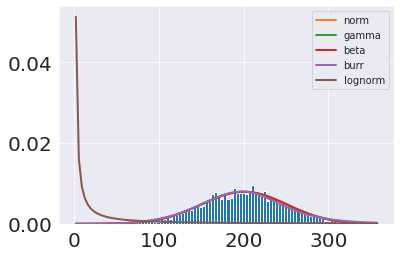

In [438]:
# total eve minutes is also a normal distribution
f = Fitter(df_train.total_eve_minutes,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()

f.summary()

sumsquare_error          aic           bic  kl_div
norm            0.000591  1451.826511 -67082.205888     inf
beta            0.000591  1444.889790 -67064.779860     inf
gamma           0.000592  1461.625218 -67071.095276     inf
lognorm         0.000593  1479.724191 -67059.028414     inf
burr            0.000791  1446.328059 -65829.363628     inf

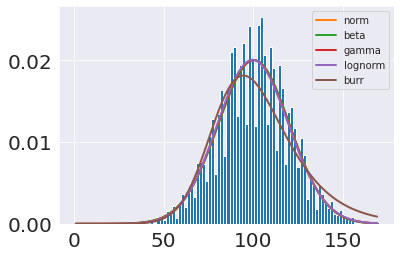

In [439]:
f = Fitter(df_train.total_eve_calls,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()

f.summary()

sumsquare_error         aic           bic  kl_div
norm            0.002679  920.940857 -60660.754072     inf
gamma           0.002683  926.803483 -60646.200562     inf
lognorm         0.002684  928.198399 -60644.595278     inf
beta            0.002698  920.708466 -60613.085724     inf
burr            0.003997  877.570404 -58943.533626     inf

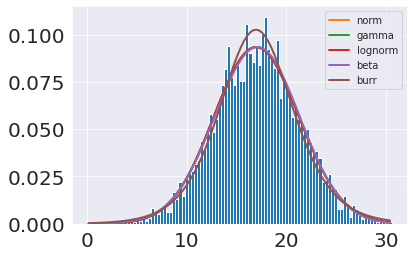

In [440]:
f = Fitter(df_train.total_eve_charge,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()

f.summary()

sumsquare_error          aic           bic  kl_div
norm            0.000019  1484.814700 -81594.793648     inf
gamma           0.000019  1487.060651 -81585.652811     inf
beta            0.000019  1489.206293 -81575.851490     inf
burr            0.000044  1544.062100 -78112.715492     inf
lognorm         0.003676  1615.392031 -59308.037701     inf

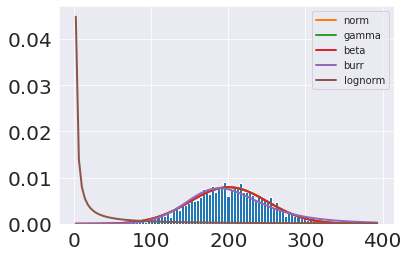

In [441]:
f = Fitter(df_train.total_night_minutes,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()

f.summary()

sumsquare_error          aic           bic  kl_div
norm            0.000547  1457.763233 -67413.941788     inf
gamma           0.000547  1461.552840 -67403.231251     inf
beta            0.000547  1463.818907 -67394.513147     inf
lognorm         0.000550  1477.689317 -67382.913863     inf
burr            0.000602  1380.262455 -66991.918151     inf

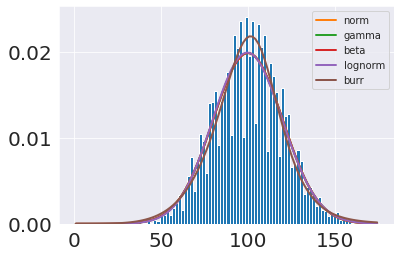

In [442]:
f = Fitter(df_train.total_night_calls,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()

f.summary()

sumsquare_error         aic           bic  kl_div
norm            0.010007  864.317352 -55059.504174     inf
gamma           0.010010  866.561977 -55049.868184     inf
beta            0.010014  868.697982 -55039.779009     inf
lognorm         0.010133  868.338165 -54997.953080     inf
burr            0.014657  825.252937 -53421.088424     inf

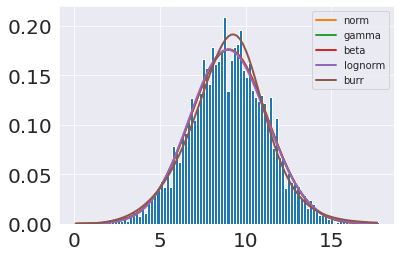

In [443]:
f = Fitter(df_train.total_night_charge,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()

f.summary()

sumsquare_error         aic           bic  kl_div
beta            0.103740  838.773204 -45103.867475     inf
burr            0.103808  790.884128 -45101.087689     inf
norm            0.104751  829.288717 -45079.384937     inf
lognorm         0.104890  833.958925 -45065.401982     inf
gamma           0.106874  827.496113 -44985.740283     inf

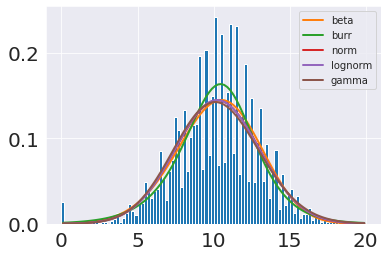

In [444]:
f = Fitter(df_train.total_intl_minutes,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()

f.summary()

sumsquare_error          aic           bic  kl_div
burr            2.723691   923.327760 -31215.498051     inf
lognorm         2.724298   938.551531 -31222.905293     inf
gamma           2.726712   993.919354 -31219.141440     inf
beta            2.728955  1101.789087 -31207.292378     inf
norm            2.769918  1429.753108 -31160.680955     inf

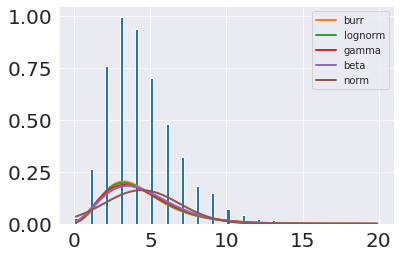

In [445]:
f = Fitter(df_train.total_intl_calls,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()

f.summary()

sumsquare_error         aic           bic  kl_div
beta            1.540893  576.164342 -33636.407941     inf
norm            1.555724  567.456122 -33612.406345     inf
lognorm         1.557882  570.331418 -33598.159625     inf
gamma           1.583015  567.203259 -33530.142870     inf
burr            2.215095  595.486491 -32093.941945     inf

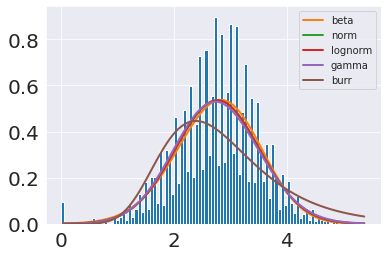

In [446]:
f = Fitter(df_train.total_intl_charge,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()

f.summary()

sumsquare_error          aic           bic  kl_div
burr           25.480749   781.160796 -21712.773175     inf
gamma          26.269112   868.543861 -21591.627875     inf
beta           26.602065   812.487726 -21529.744292     inf
lognorm        27.100227   705.122686 -21459.247640     inf
norm           27.209513  1137.532327 -21450.498034     inf

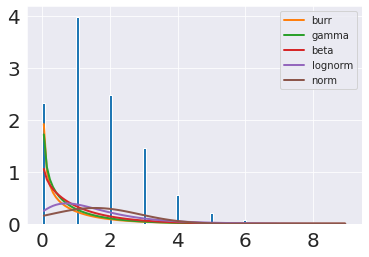

In [447]:
f = Fitter(df_train.number_customer_service_calls,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()

f.summary()

#### 5.2 Multivariate Plots
Now we can look at the interactions between the variables.

- First, let’s look at scatterplots of all pairs of attributes. This can be helpful to spot structured relationships between input variables.

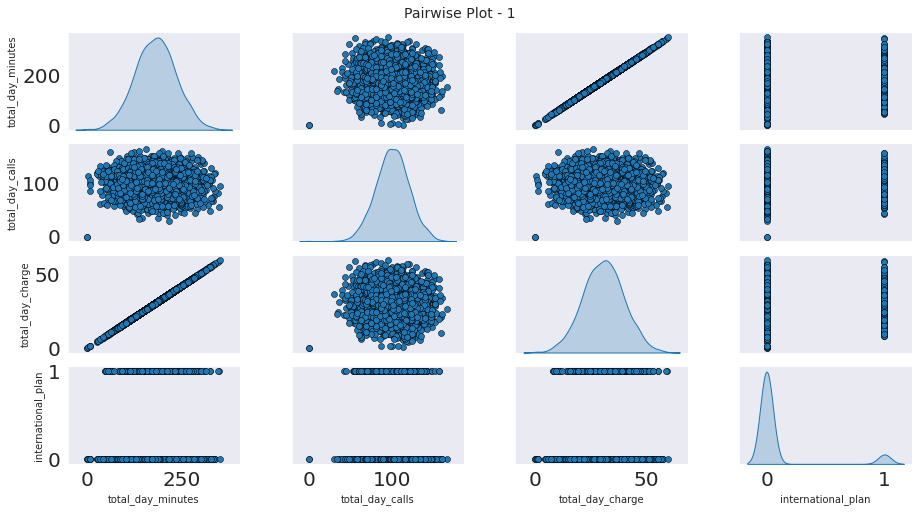

In [448]:
# Pair-wise Scatter Plots
# 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'international_plan'

cols = ['total_day_minutes', 'total_day_calls', 'total_day_charge', 'international_plan']
pp = sns.pairplot(df_train[cols], height=1.8, aspect=1.8,
                  plot_kws={'edgecolor':"k", 'linewidth':0.5},
                  diag_kind="kde", diag_kws={'shade':True})
   
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Pairwise Plot - 1', fontsize=14)

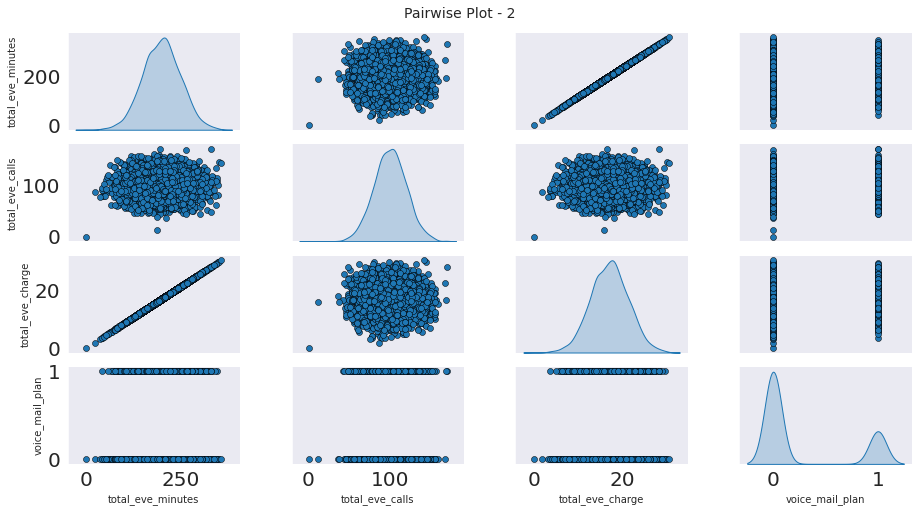

In [449]:
# Pair-wise Scatter Plots
# 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'voice_mail_plan'

cols = ['total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'voice_mail_plan']
pp = sns.pairplot(df_train[cols], height=1.8, aspect=1.8,
                  plot_kws={'edgecolor':"k", 'linewidth':0.5},
                  diag_kind="kde", diag_kws={'shade':True})
 
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Pairwise Plot - 2', fontsize=14)

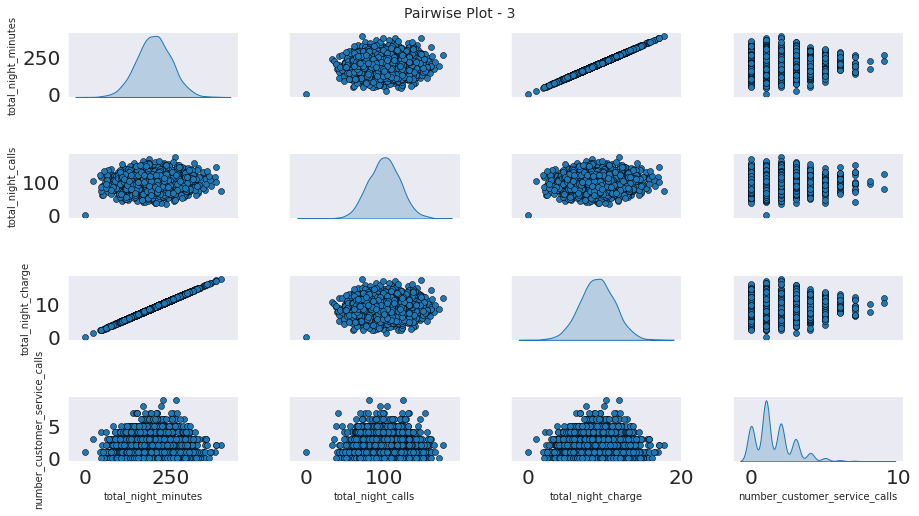

In [450]:
# Pair-wise Scatter Plots
# 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'number_customer_service_calls'

cols = ['total_night_minutes', 'total_night_calls', 'total_night_charge', 'number_customer_service_calls']
pp = sns.pairplot(df_train[cols], height=1.8, aspect=1.8,
                  plot_kws={'edgecolor':"k", 'linewidth':0.5},
                  diag_kind="kde", diag_kws={'shade':True})

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Pairwise Plot - 3', fontsize=14)

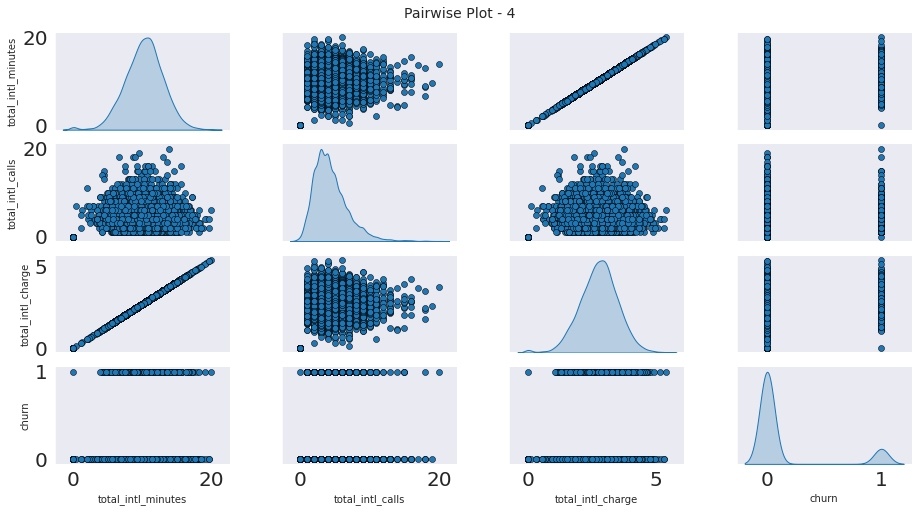

In [451]:
# Pair-wise Scatter Plots
# 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'churn'

cols = ['total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'churn']
pp = sns.pairplot(df_train[cols], height=1.8, aspect=1.8,
                  plot_kws={'edgecolor':"k", 'linewidth':0.5},
                  diag_kind="kde", diag_kws={'shade':True})

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Pairwise Plot - 4', fontsize=14)

### 6. Dimentionality Reduction Techniques



1.   Percent missing values -- ✅ Using this in notebook
2.   Amount of Variation -- ✅ Using this in notebook
3.   Pairwise Correlation -- ✅ Using this in notebook
4.   Multicolinearity
5.   Principal Component Analysis(PCA)
6.   Cluster Analysis
7.   Correlation (with target) -- ✅ Using this in notebook
8.   Forward Selection
9.   Backward Elimination(RFE)
10.  Stepwise Selection
11.  LASSO
12.  Tree-based selection -- ✅ Using this in notebook





In [452]:
# Check % of missing values
percent_missing = df_train.isnull().sum() * 100 / len(df_train)
missing_value_df = pd.DataFrame({'column_name': df_train.columns,
                                 'percent_missing': percent_missing})
missing_value_df

column_name  percent_missing
state                                                  state              0.0
account_length                                account_length              0.0
international_plan                        international_plan              0.0
voice_mail_plan                              voice_mail_plan              0.0
number_vmail_messages                  number_vmail_messages              0.0
total_day_minutes                          total_day_minutes              0.0
total_day_calls                              total_day_calls              0.0
total_day_charge                            total_day_charge              0.0
total_eve_minutes                          total_eve_minutes              0.0
total_eve_calls                              total_eve_calls              0.0
total_eve_charge                            total_eve_charge              0.0
total_night_minutes                      total_night_minutes              0.0
total_night_calls                          total_night_calls              0.0
total_night_charge                        total_night_charge              0.0
total_intl_minutes                        total_intl_minutes              0.0
total_intl_calls                            total_intl_calls              0.0
total_intl_charge                          total_intl_charge              0.0
number_customer_service_calls  number_customer_service_calls              0.0
churn                                                  churn              0.0
area_code_area_code_408              area_code_area_code_408              0.0
area_code_area_code_415              area_code_area_code_415              0.0
area_code_area_code_510              area_code_area_code_510              0.0

In [453]:
# Check amount of variation
df_train.var()


state                             218.124818
account_length                   1575.963008
international_plan                  0.084515
voice_mail_plan                     0.193233
number_vmail_messages             180.630433
total_day_minutes                2917.336473
total_day_calls                   394.054948
total_day_charge                   84.310888
total_eve_minutes                2525.014078
total_eve_calls                   396.352000
total_eve_charge                   18.243252
total_night_minutes              2535.479804
total_night_calls                 403.737482
total_night_charge                  5.134402
total_intl_minutes                  7.618162
total_intl_calls                    6.066709
total_intl_charge                   0.555329
number_customer_service_calls       1.719858
churn                               0.120936
area_code_area_code_408             0.190279
area_code_area_code_415             0.250043
area_code_area_code_510             0.186777
dtype: flo

In [454]:
# y = df_train['churn']
# X_train = df_train.drop(columns=['churn', 'state', 'area_code', 'international_plan', 'voice_mail_plan'])
# X_train.head()


corr_matrix = df_train.corr()
corr_matrix



state  ...  area_code_area_code_510
state                          1.000000  ...                 0.021298
account_length                 0.008818  ...                -0.019074
international_plan             0.003822  ...                 0.027359
voice_mail_plan               -0.034752  ...                -0.009043
number_vmail_messages         -0.030857  ...                -0.007583
total_day_minutes              0.014263  ...                -0.009924
total_day_calls               -0.009890  ...                -0.037065
total_day_charge               0.014262  ...                -0.009928
total_eve_minutes              0.001603  ...                 0.012073
total_eve_calls               -0.009116  ...                -0.007559
total_eve_charge               0.001603  ...                 0.012086
total_night_minutes            0.004827  ...                 0.005004
total_night_calls             -0.006597  ...                 0.017141
total_night_charge             0.004815  ...                 0.004992
total_intl_minutes            -0.010260  ...                -0.008900
total_intl_calls               0.007469  ...                -0.020612
total_intl_charge             -0.010284  ...                -0.008992
number_customer_service_calls -0.020421  ...                 0.023932
churn                          0.007181  ...                 0.016309
area_code_area_code_408       -0.012611  ...                -0.336869
area_code_area_code_415       -0.007406  ...                -0.570414
area_code_area_code_510        0.021298  ...                 1.000000

[22 rows x 22 columns]

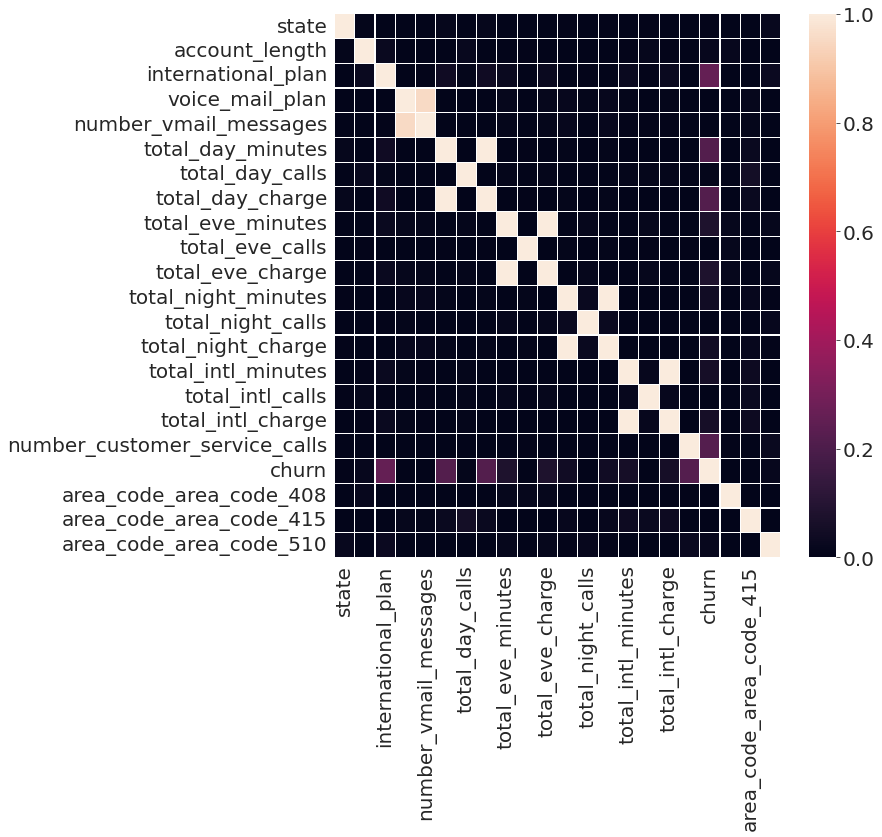

In [455]:

sns.color_palette("mako", as_cmap=True)
fig, ax = plt.subplots(figsize=(10,10)) 
ax = sns.heatmap(df_train.corr(), linewidths=0.1, vmin=0, vmax=1)


In [456]:
corr = df_train.corr()
corr['churn'].sort_values(ascending=False)

churn                            1.000000
international_plan               0.259053
number_customer_service_calls    0.221220
total_day_minutes                0.215272
total_day_charge                 0.215263
total_eve_minutes                0.078855
total_eve_charge                 0.078852
total_intl_minutes               0.055186
total_intl_charge                0.055177
total_night_minutes              0.046647
total_night_charge               0.046641
account_length                   0.019378
area_code_area_code_510          0.016309
total_day_calls                  0.011640
state                            0.007181
area_code_area_code_408         -0.001251
total_eve_calls                 -0.006817
total_night_calls               -0.012699
area_code_area_code_415         -0.013004
total_intl_calls                -0.034334
number_vmail_messages           -0.100347
voice_mail_plan                 -0.114643
Name: churn, dtype: float64

### 7. Feature Engineering

We can create new features for this dataset taking insights on the problem statement.

Following could be the new features -

1. **TotalDaychargePerCall** -> As a function of *totaldaycharge, totaldayminutes and totaldaycalls*
2. **TotalNightchargePercall** -> As a function of *totalnightcharge, totalnightminutes and totalnightcalls*
3. **TotalEvechargePerCall** -> As a function of *totalevecharge, totaleveminutes and totalevecalls*
4. **TotalIntnlchargePerCall** -> As a function of *totalintnlcharge, totalintnlminutes and totalintnlcalls*

In [457]:
df_train['TotalDaychargePerCall'] = (df_train['total_day_charge']/(df_train['total_day_minutes']/df_train['total_day_calls'].astype(float))).astype(float)
df_train['TotalNightchargePercall'] = (df_train['total_night_charge']/(df_train['total_night_minutes']/df_train['total_night_calls'].astype(float))).astype(float)
df_train['TotalEvechargePerCall '] = (df_train['total_eve_charge']/(df_train['total_eve_minutes']/df_train['total_eve_calls'].astype(float))).astype(float)
df_train['TotalIntnlchargePerCall'] = (df_train['total_intl_charge']/(df_train['total_intl_minutes']/df_train['total_intl_calls'].astype(float))).astype(float)

df_test['TotalDaychargePerCall'] = (df_test['total_day_charge']/(df_test['total_day_minutes']/df_test['total_day_calls'].astype(float))).astype(float)
df_test['TotalNightchargePercall'] = (df_test['total_night_charge']/(df_test['total_night_minutes']/df_test['total_night_calls'].astype(float))).astype(float)
df_test['TotalEvechargePerCall '] = (df_test['total_eve_charge']/(df_test['total_eve_minutes']/df_test['total_eve_calls'].astype(float))).astype(float)
df_test['TotalIntnlchargePerCall'] = (df_test['total_intl_charge']/(df_test['total_intl_minutes']/df_test['total_intl_calls'].astype(float))).astype(float)

In [458]:
# For TotalIntnlchargePerCall there were rows that had the total_intl_charge or total_intl_calls or total_intl_minutes as 0, so that created empty rows
# We handle that by filling those emty values with 0
df_train.fillna(0, inplace=True)
df_test.fillna(0, inplace=True)

In [459]:
df_train.head()

state  account_length  ...  TotalEvechargePerCall   TotalIntnlchargePerCall
0     35             107  ...                8.756317                 0.810219
1     31             137  ...                9.348185                 1.348361
2     35              84  ...                7.477868                 1.887879
3     36              75  ...               10.373702                 0.810891
4     19             121  ...                9.179225                 1.894667

[5 rows x 26 columns]

In [460]:
# from pandas_profiling import ProfileReport
# profile = ProfileReport(df_train)
# profile.to_notebook_iframe()
# # to save the file
# churn_report1 = profile.to_file(output_file="churn_report_with_feature_engineering.html")

#### 7.1 Outlier Detection and Removal

In the dataset, if there are outliers, data points that are unsual for the dataset to have, they need to be handled

In [461]:
# from scipy import stats
# import numpy as np
# z = np.abs(stats.zscore(df_train))
# print(z)
# threshold = 3
# print(np.where(z > 3))

# df_train_noOutliers = df_train[(z < 3).all(axis=1)]

In [462]:
#functions for removing outliers
def remove_outliers(train,labels):
    for label in labels:
        q1 = train[label].quantile(0.25)
        q3 = train[label].quantile(0.75)
        iqr = q3 - q1
        upper_bound = q3 + 1.5 * iqr
        lower_bound = q1 - 1.5 * iqr
        train[label] = train[label].mask(train[label]< lower_bound, train[label].median(),axis=0)
        train[label] = train[label].mask(train[label]> upper_bound, train[label].median(),axis=0)

    return train

In [463]:
#Extract the numerical features from the dataset
num_var = [feature for feature in df_train.columns if df_train[feature].dtypes != 'O']
print('List of Numerical featues {}'.format(num_var))

List of Numerical featues ['state', 'account_length', 'international_plan', 'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls', 'churn', 'area_code_area_code_408', 'area_code_area_code_415', 'area_code_area_code_510', 'TotalDaychargePerCall', 'TotalNightchargePercall', 'TotalEvechargePerCall ', 'TotalIntnlchargePerCall']


In [464]:
df_train.churn.value_counts()

0    3652
1     598
Name: churn, dtype: int64

In [465]:
# df_train = remove_outliers(df_train[df_train.churn == 0], num_var)

In [466]:
# df_train.churn.value_counts()

Lets see if the outliers were removed by visualizing the Univariate Boxplot again

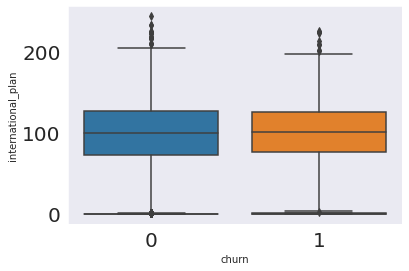

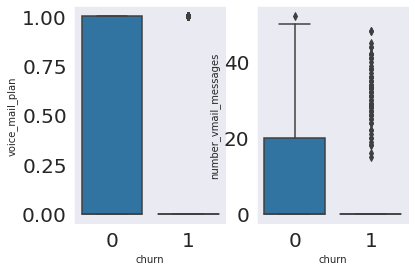

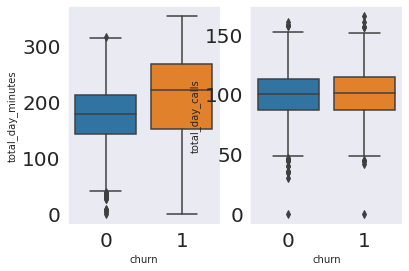

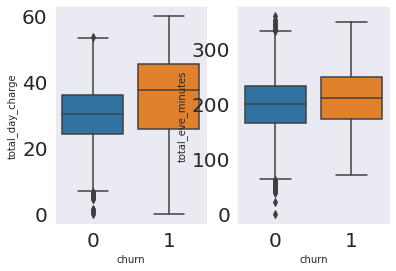

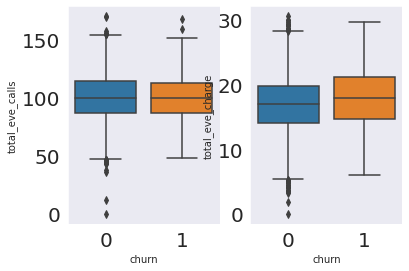

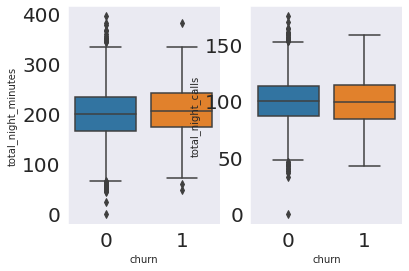

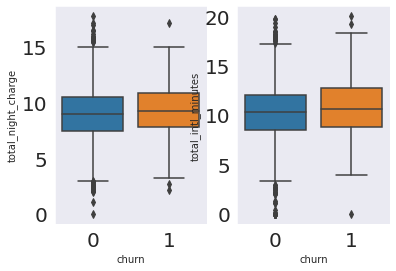

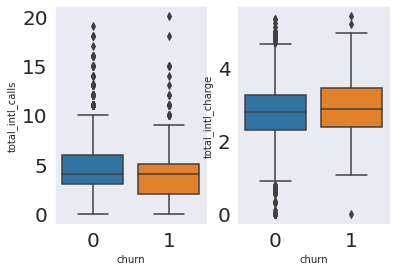

In [467]:
# To organize our plots and keep them in the same figure
# reference - https://seaborn.pydata.org/generated/seaborn.boxplot.html
# fig, axs = plt.subplots(ncols=2)
# First box plot of state vs churn
# sns.boxplot(x='churn', y='state', data=df_train, ax=axs[0])
# Second box plot for account length vs churn
sns.boxplot(x='churn', y='account_length', data=df_train)

# fig, axs = plt.subplots(ncols=2)
# Third box plot for area code vs churn
# sns.boxplot(x='churn', y='area_code', data=df_train, ax=axs[0])
# Fourth box plot for international plan vs churn
sns.boxplot(x='churn', y='international_plan', data=df_train)

fig, axs = plt.subplots(ncols=2)
# Third box plot for voice_mail_plan vs churn
sns.boxplot(x='churn', y='voice_mail_plan', data=df_train, ax=axs[0])
# Fourth box plot for number_vmail_messages vs churn
sns.boxplot(x='churn', y='number_vmail_messages', data=df_train, ax=axs[1])

fig, axs = plt.subplots(ncols=2)
# Third box plot for total_day_messages vs churn
sns.boxplot(x='churn', y='total_day_minutes', data=df_train, ax=axs[0])
# Fourth box plot for total_day_calls vs churn
sns.boxplot(x='churn', y='total_day_calls', data=df_train, ax=axs[1])

fig, axs = plt.subplots(ncols=2)
# Third box plot for total_day_charge vs churn
sns.boxplot(x='churn', y='total_day_charge', data=df_train, ax=axs[0])
# Fourth box plot for total_eve_minutes vs churn
sns.boxplot(x='churn', y='total_eve_minutes', data=df_train, ax=axs[1])

fig, axs = plt.subplots(ncols=2)
# Third box plot for total_eve_calls vs churn
sns.boxplot(x='churn', y='total_eve_calls', data=df_train, ax=axs[0])
# Fourth box plot for total_eve_charge vs churn
sns.boxplot(x='churn', y='total_eve_charge', data=df_train, ax=axs[1])

fig, axs = plt.subplots(ncols=2)
# Third box plot for total_night_minutes vs churn
sns.boxplot(x='churn', y='total_night_minutes', data=df_train, ax=axs[0])
# Fourth box plot for total_night_calls vs churn
sns.boxplot(x='churn', y='total_night_calls', data=df_train, ax=axs[1])

fig, axs = plt.subplots(ncols=2)
# Third box plot for total_night_charge vs churn
sns.boxplot(x='churn', y='total_night_charge', data=df_train, ax=axs[0])
# Fourth box plot for total_intl_minutes vs churn
sns.boxplot(x='churn', y='total_intl_minutes', data=df_train, ax=axs[1])

fig, axs = plt.subplots(ncols=2)
# Third box plot for total_intl_calls vs churn
sns.boxplot(x='churn', y='total_intl_calls', data=df_train, ax=axs[0])
# Fourth box plot for total_intl_charge vs churn
sns.boxplot(x='churn', y='total_intl_charge', data=df_train, ax=axs[1])

# fig, axs = plt.subplots(ncols=1)
# Third box plot for number_customer_service_calls vs churn
# sns.boxplot(x='churn', y='number_customer_service_calls', data=df_train, ax=axs[0])


# this prevents plots from overlapping
# plt.tight_layout()
plt.subplots_adjust(hspace = 1)

In [468]:
df_train.shape

(4250, 26)

In [469]:
df_train.corr()

state  ...  TotalIntnlchargePerCall
state                          1.000000  ...                 0.007450
account_length                 0.008818  ...                 0.013714
international_plan             0.003822  ...                 0.006937
voice_mail_plan               -0.034752  ...                -0.005657
number_vmail_messages         -0.030857  ...                 0.006592
total_day_minutes              0.014263  ...                 0.003955
total_day_calls               -0.009890  ...                 0.009366
total_day_charge               0.014262  ...                 0.003950
total_eve_minutes              0.001603  ...                 0.012280
total_eve_calls               -0.009116  ...                 0.004931
total_eve_charge               0.001603  ...                 0.012281
total_night_minutes            0.004827  ...                -0.024217
total_night_calls             -0.006597  ...                 0.003812
total_night_charge             0.004815  ...                -0.024198
total_intl_minutes            -0.010260  ...                 0.019142
total_intl_calls               0.007469  ...                 0.999997
total_intl_charge             -0.010284  ...                 0.019236
number_customer_service_calls -0.020421  ...                -0.015342
churn                          0.007181  ...                -0.034316
area_code_area_code_408       -0.012611  ...                -0.008932
area_code_area_code_415       -0.007406  ...                 0.025616
area_code_area_code_510        0.021298  ...                -0.020624
TotalDaychargePerCall         -0.009893  ...                 0.009350
TotalNightchargePercall       -0.006607  ...                 0.003860
TotalEvechargePerCall         -0.009107  ...                 0.004933
TotalIntnlchargePerCall        0.007450  ...                 1.000000

[26 rows x 26 columns]

### 8. Evaluate Algorithms & Feature Selection

  Now it is time to create some models of the data and estimate their accuracy on unseen data.



  - Separate out a validation dataset.
  - Build models distinctly and find the best hyper parameters for them.
  - Set-up the test harness to use 10-fold cross validation.
  - Build multiple different models to predict churn of customers
  - Select the best model.


#### 8.1 Create a Validation Dataset

We need to know that the model we created is good. We also want a more concrete estimate of the accuracy of the best model on unseen data by evaluating it on actual unseen data.

- We will split the loaded dataset into two, **80%** of which we will use to **train**, evaluate and select among our models, and **20%** that we will hold back as a **validation** dataset.

In [470]:
# Removing cols with high correlation
# df_train.drop('number_vmail_messages', axis=1, inplace=True)
# df_test.drop('number_vmail_messages', axis=1, inplace=True)
x = df_train.drop('churn',axis=1)
y = df_train.churn
# id_submission = df_test.id
# df_test = df_test.drop('id', axis=1)
# spliting the train data into train and validation set -> HERE I am calling x_test and y_test as THE VALIDATION SET from the training set.
x_train, x_test , y_train, y_test = train_test_split(x, y , test_size=0.2, random_state=43)

In [471]:
df_train.churn.value_counts()

0    3652
1     598
Name: churn, dtype: int64

#### Handling the Imbalanced dataset using SMOTE or the Synthetic Minority Over-sampling Technique.

In [519]:
print('Before upsampling count of label 0 {}'.format(sum(y_train==0)))
print('Before upsampling count of label 1 {}'.format(sum(y_train==1)))
# Minority Over Sampling Technique
sm = SMOTE(sampling_strategy = 1, random_state=43)   
x_train_s, y_train_s = sm.fit_resample(x_train, y_train.ravel())
x_train_s = pd.DataFrame(x_train_s, columns=x_train.columns)
                                         
print('After upsampling count of label 0 {}'.format(sum(y_train_s==0)))
print('After upsampling count of label 1 {}'.format(sum(y_train_s==1)))

Before upsampling count of label 0 2916
Before upsampling count of label 1 484
After upsampling count of label 0 2916
After upsampling count of label 1 2916


Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.


In [473]:
# creating the object of minmax scaler
# scaler = MinMaxScaler()
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)
# test = scaler.transform(df_test)

#### 8.2  Build models **distinctly** and find the **best hyper parameters** for them

We are using 4 different types of models - 

1. Logistic Regression(LR)
2. SVC from Support Vector Machine(SVM)
3. Ensembles - Random Forest Classifier(RFC)
4. XGBoost - decision-tree-based ensemble Machine Learning algorithm

### Evaluation Metrics - 

If we talk about classification problems, the most common metrics used are: 
- Accuracy 
- Precision (P) 
- Recall (R) 
- F1 score (F1) 
- Area under the ROC (Receiver Operating Characteristic) curve or simply 
AUC (AUC) 

***Note***: Precision and recall depend on true positive, false positive and false negative while F1 depends on precision and recall. 

#### SVC model Building, hyper parameter tuning and metrics evaluation, ROC, AUC

Accuracy: 
0.8694117647058823
Classification report: 
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       736
           1       1.00      0.03      0.05       114

    accuracy                           0.87       850
   macro avg       0.93      0.51      0.49       850
weighted avg       0.89      0.87      0.81       850

Confusion Matrix
[[736   0]
 [111   3]]


True Positives :  736
False Negatives :  0
False Positives :  111
True Negatives :  3




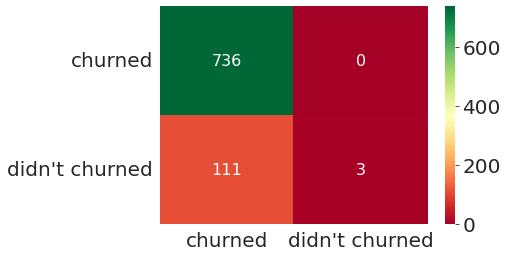

In [474]:
svc = SVC(kernel='rbf', decision_function_shape='ovr', random_state=1)
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
print('Accuracy: ')
print('{}'.format(accuracy_score(y_test, y_pred)))
print('Classification report: ')
print('{}'.format(classification_report(y_test, y_pred)))
print('Confusion Matrix')
print('{}'.format(confusion_matrix(y_test, y_pred)))
print('\n')
clf_svc = confusion_matrix(y_test, y_pred)
print('True Positives : ',clf_svc[0][0])
print('False Negatives : ',clf_svc[0][1])
print('False Positives : ',clf_svc[1][0])
print('True Negatives : ',clf_svc[1][1])
print('\n')

labels = ['churned', "didn't churned"]
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='RdYlGn', fmt='d', annot_kws={'size': 16}, xticklabels=labels, yticklabels=labels)

AUC ROC score for the SVC model

In [475]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred)
print('roc_auc_score for SVC: ', roc_auc_score(y_test, y_pred))

roc_auc_score for SVC:  0.5131578947368421


In [476]:
# plt.title('Receiver Operating Characteristic - SVC')
# plt.plot(false_positive_rate, true_positive_rate)
# plt.plot([0, 1], ls="--")
# plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()

In [477]:
# from sklearn.model_selection import GridSearchCV
 
# # defining parameter range
# param_grid = {'C': [1, 10, 20],
#               'gamma': [1, 0.1, 0.01],
#               'kernel': ['rbf']}
 
# grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3, cv=10)
 
# # fitting the model for grid search
# grid.fit(x_train, y_train)

For SVC model, using the GridSearchCV, we are able to get the best set of hyperparameters as follows - 


```
{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
```

We will again train the SVC using these parameters

In [478]:
# grid.best_params_

Having used these params, we were able to improve the accuracy of the SVC model 

Accuracy: 
0.9035294117647059
Classification report: 
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       736
           1       0.82      0.36      0.50       114

    accuracy                           0.90       850
   macro avg       0.86      0.67      0.72       850
weighted avg       0.90      0.90      0.89       850

Confusion Matrix
[[727   9]
 [ 73  41]]


True Positives :  727
False Negatives :  9
False Positives :  73
True Negatives :  41


Cohen kappa score: 
0.45546875


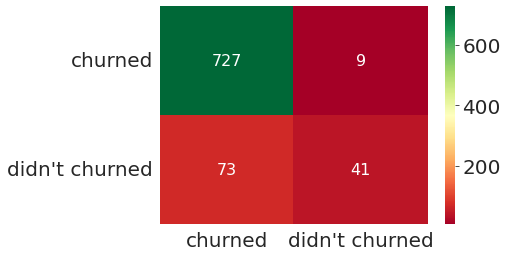

In [479]:
svc = SVC(C= 10, gamma= 0.0001, kernel= 'rbf', random_state=1)
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
print('Accuracy: ')
print('{}'.format(accuracy_score(y_test, y_pred)))
print('Classification report: ')
print('{}'.format(classification_report(y_test, y_pred)))
print('Confusion Matrix')
print('{}'.format(confusion_matrix(y_test, y_pred)))
print('\n')
clf_svc = confusion_matrix(y_test, y_pred)
print('True Positives : ',clf_svc[0][0])
print('False Negatives : ',clf_svc[0][1])
print('False Positives : ',clf_svc[1][0])
print('True Negatives : ',clf_svc[1][1])
print('\n')

labels = ['churned', "didn't churned"]
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='RdYlGn', fmt='d', annot_kws={'size': 16}, xticklabels=labels, yticklabels=labels)

AUC ROC score for the SVC model

In [480]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred)
print('roc_auc_score for SVC: ', roc_auc_score(y_test, y_pred))
print(threshold)

roc_auc_score for SVC:  0.6737104309687262
[2 1 0]


In [481]:
# plt.title('Receiver Operating Characteristic - SVC')
# plt.plot(false_positive_rate, true_positive_rate)
# plt.plot([0, 1], ls="--")
# plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()

#### SVC optimized model using SMOTE

In [527]:
svc = SVC(C= 10, gamma= 0.0001, kernel= 'rbf', random_state=1)
svc.fit(x_train_s, y_train_s)
y_pred = svc.predict(x_test)
print('Accuracy: ')
print('{}'.format(accuracy_score(y_test, y_pred)))
print('Classification report: ')
print('{}'.format(classification_report(y_test, y_pred)))
print('Confusion Matrix')
print('{}'.format(confusion_matrix(y_test, y_pred)))
print('\n')
clf_svc = confusion_matrix(y_test, y_pred)
print('True Positives : ',clf_svc[0][0])
print('False Negatives : ',clf_svc[0][1])
print('False Positives : ',clf_svc[1][0])
print('True Negatives : ',clf_svc[1][1])
print('\n')
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred)
print('roc_auc_score for SVC: ', roc_auc_score(y_test, y_pred))

Accuracy: 
0.86
Classification report: 
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       736
           1       0.48      0.52      0.50       114

    accuracy                           0.86       850
   macro avg       0.70      0.72      0.71       850
weighted avg       0.86      0.86      0.86       850

Confusion Matrix
[[672  64]
 [ 55  59]]


True Positives :  672
False Negatives :  64
False Positives :  55
True Negatives :  59


roc_auc_score for SVC:  0.7152936689549962


#### Ensemble Random Forest Classifier Building, hyper parameter tuning and metrics evaluation, ROC, AUC

Accuracy: 
0.9588235294117647
Classification report: 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       736
           1       0.96      0.72      0.82       114

    accuracy                           0.96       850
   macro avg       0.96      0.86      0.90       850
weighted avg       0.96      0.96      0.96       850

Confusion Matrix
[[733   3]
 [ 32  82]]


True Positives :  733
False Negatives :  3
False Positives :  32
True Negatives :  82


Cohen kappa score: 
0.8013620885357549

--------Plotting Confusion Matrix---------


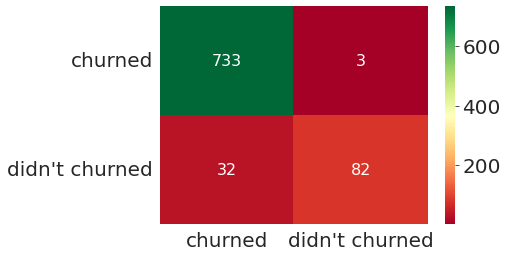

In [482]:
rfc = RandomForestClassifier(random_state=43)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
print('Accuracy: ')
print('{}'.format(accuracy_score(y_test, y_pred)))
print('Classification report: ')
print('{}'.format(classification_report(y_test, y_pred)))
print('Confusion Matrix')
print('{}'.format(confusion_matrix(y_test, y_pred)))
print('\n')
clf_rfc = confusion_matrix(y_test, y_pred)
print('True Positives : ',clf_rfc[0][0])
print('False Negatives : ',clf_rfc[0][1])
print('False Positives : ',clf_rfc[1][0])
print('True Negatives : ',clf_rfc[1][1])
print('\n')
print('Cohen kappa score: ')
print('{}'.format(cohen_kappa_score(y_test, y_pred)))
print('\n--------Plotting Confusion Matrix---------')
labels = ['churned', "didn't churned"]
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='RdYlGn', fmt='d', annot_kws={'size': 16}, xticklabels=labels, yticklabels=labels)

AUC ROC score for the RF classifier model

In [483]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred)
print('roc_auc_score for RFC: ', roc_auc_score(y_test, y_pred))
print(threshold)

roc_auc_score for RFC:  0.8576110793287567
[2 1 0]


In [484]:
# plt.title('Receiver Operating Characteristic - RFC')
# plt.plot(false_positive_rate, true_positive_rate)
# plt.plot([0, 1], ls="--")
# plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()

In [485]:
# from sklearn.model_selection import RandomizedSearchCV
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1200, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(1, 55, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]# Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
               
# print(random_grid)


# grid = RandomizedSearchCV(RandomForestClassifier(), random_grid, verbose=3)
# grid.fit(x_train, y_train)

After using RandomizedSearchCV to get the right set of hyperparameters for the Random Forest Classsifier model, the following were the parameters that suit best - 


```
 bootstrap= True,
 max_depth= 22,
 random_state = 0,
 max_features= 'sqrt',
 min_samples_leaf= 1,
 min_samples_split= 5,
 n_estimators= 311
```




In [486]:
# grid.best_params_

Running out model again, but this time with the hyperparameters we got from RandomizedSearchCV output.

This time we were able to improve the accuracy of the RFC.

Accuracy: 
0.9611764705882353
Classification report: 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       736
           1       0.98      0.73      0.83       114

    accuracy                           0.96       850
   macro avg       0.97      0.86      0.91       850
weighted avg       0.96      0.96      0.96       850

Confusion Matrix
[[734   2]
 [ 31  83]]


True Positives :  734
False Negatives :  2
False Positives :  31
True Negatives :  83


Cohen kappa score: 
0.8127128263337117

--------Plotting Confusion Matrix---------


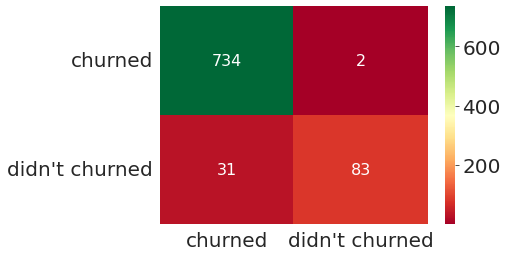

In [487]:
rfc = RandomForestClassifier(bootstrap= True,
 max_depth= 22,
 random_state = 43,
 max_features= 'sqrt',
 min_samples_leaf= 1,
 min_samples_split= 5,
 n_estimators= 311)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
print('Accuracy: ')
print('{}'.format(accuracy_score(y_test, y_pred)))
print('Classification report: ')
print('{}'.format(classification_report(y_test, y_pred)))
print('Confusion Matrix')
print('{}'.format(confusion_matrix(y_test, y_pred)))
print('\n')
clf_rfc = confusion_matrix(y_test, y_pred)
# if your model incorrectly (or falsely) predicts positive class, it is 
# a false positive. If your model incorrectly (or falsely) predicts negative class, it is a 
# false negative. 
print('True Positives : ',clf_rfc[0][0])
print('False Negatives : ',clf_rfc[0][1])
print('False Positives : ',clf_rfc[1][0])
print('True Negatives : ',clf_rfc[1][1])
print('\n')

print('\n--------Plotting Confusion Matrix---------')
labels = ['churned', "didn't churned"]
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='RdYlGn', fmt='d', annot_kws={'size': 16}, xticklabels=labels, yticklabels=labels)

AUC ROC score for the optimized RFC model

In [488]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred)
print('roc_auc_score for Optimized RFC: ', roc_auc_score(y_test, y_pred))
print(true_positive_rate)

roc_auc_score for Optimized RFC:  0.8626763920671244
[0.         0.72807018 1.        ]


In [489]:
# plt.figure(figsize=(7, 7)) 
# plt.fill_between(false_positive_rate, true_positive_rate, alpha=0.4) 
# plt.plot(false_positive_rate, true_positive_rate, lw=3) 
# plt.xlim(0, 1.0) 
# plt.ylim(0, 1.0) 
# plt.xlabel('FPR', fontsize=15) 
# plt.ylabel('TPR', fontsize=15) 
# plt.title('Receiver Operating Characteristic - Optimized RFC')
# plt.show()

In [490]:
# grid.best_params_

#### RF Optimized model using SMOTE

In [528]:
rfc = RandomForestClassifier(bootstrap= True,
 max_depth= 22,
 random_state = 43,
 max_features= 'sqrt',
 min_samples_leaf= 1,
 min_samples_split= 5,
 n_estimators= 311)
rfc.fit(x_train_s, y_train_s)
y_pred = rfc.predict(x_test)
print('Accuracy: ')
print('{}'.format(accuracy_score(y_test, y_pred)))
print('Classification report: ')
print('{}'.format(classification_report(y_test, y_pred)))
print('Confusion Matrix')
print('{}'.format(confusion_matrix(y_test, y_pred)))
print('\n')
clf_rfc = confusion_matrix(y_test, y_pred)
# if your model incorrectly (or falsely) predicts positive class, it is 
# a false positive. If your model incorrectly (or falsely) predicts negative class, it is a 
# false negative. 
print('True Positives : ',clf_rfc[0][0])
print('False Negatives : ',clf_rfc[0][1])
print('False Positives : ',clf_rfc[1][0])
print('True Negatives : ',clf_rfc[1][1])
print('\n')

false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred)
print('roc_auc_score for Optimized RFC: ', roc_auc_score(y_test, y_pred))

Accuracy: 
0.9505882352941176
Classification report: 
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       736
           1       0.88      0.74      0.80       114

    accuracy                           0.95       850
   macro avg       0.92      0.86      0.89       850
weighted avg       0.95      0.95      0.95       850

Confusion Matrix
[[724  12]
 [ 30  84]]


True Positives :  724
False Negatives :  12
False Positives :  30
True Negatives :  84


roc_auc_score for Optimized RFC:  0.8602688787185356


#### RFC Feature Importance and Feature Selection based on Gini-importance

Feature: area_code_area_code_408, Score: 0.00196
Feature: area_code_area_code_415, Score: 0.00209
Feature: area_code_area_code_510, Score: 0.00225
Feature: total_eve_calls, Score: 0.01543
Feature: state, Score: 0.01704
Feature: total_night_calls, Score: 0.01835
Feature: total_day_calls, Score: 0.01859
Feature: TotalEvechargePerCall , Score: 0.01942
Feature: account_length, Score: 0.02014
Feature: voice_mail_plan, Score: 0.02044
Feature: TotalNightchargePercall, Score: 0.02091
Feature: TotalDaychargePerCall, Score: 0.02221
Feature: total_intl_calls, Score: 0.02703
Feature: number_vmail_messages, Score: 0.02710
Feature: total_night_minutes, Score: 0.02878
Feature: total_night_charge, Score: 0.02930
Feature: total_intl_minutes, Score: 0.03377
Feature: total_intl_charge, Score: 0.03528
Feature: TotalIntnlchargePerCall, Score: 0.04040
Feature: total_eve_charge, Score: 0.05502
Feature: total_eve_minutes, Score: 0.05753
Feature: international_plan, Score: 0.08396
Feature: number_customer_serv

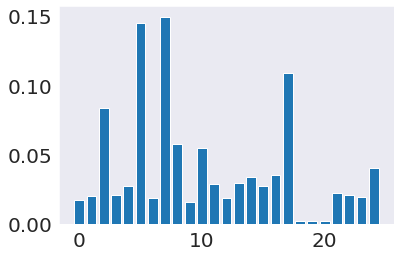

In [491]:
# get importance
importance = rfc.feature_importances_
# summarize feature importance
for i,v in sorted(zip(x_train.columns, rfc.feature_importances_), key = lambda x: x[1]):
	print('Feature: %s, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

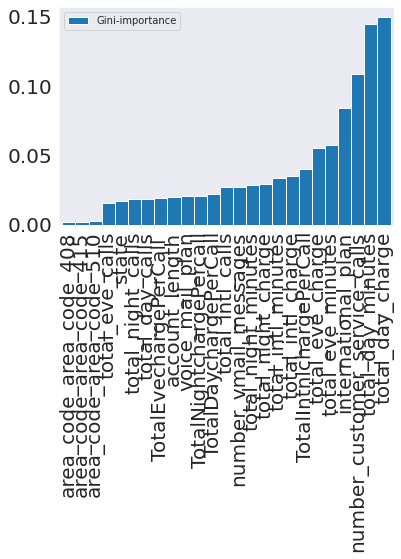

In [492]:
import pandas as pd
%matplotlib inline
#do code to support model
#"data" is the X dataframe and model is the SKlearn object

feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(x_train.columns, rfc.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance').plot(kind='bar', width=1,rot=90)

In [493]:
feature_importances = pd.DataFrame(rfc.feature_importances_, index = x_train.columns,  columns=['importance']).sort_values('importance', ascending=False)
feature_importances

importance
total_day_charge                 0.149565
total_day_minutes                0.144892
number_customer_service_calls    0.108566
international_plan               0.083963
total_eve_minutes                0.057530
total_eve_charge                 0.055017
TotalIntnlchargePerCall          0.040401
total_intl_charge                0.035280
total_intl_minutes               0.033766
total_night_charge               0.029296
total_night_minutes              0.028783
number_vmail_messages            0.027098
total_intl_calls                 0.027031
TotalDaychargePerCall            0.022208
TotalNightchargePercall          0.020907
voice_mail_plan                  0.020442
account_length                   0.020138
TotalEvechargePerCall            0.019416
total_day_calls                  0.018591
total_night_calls                0.018345
state                            0.017038
total_eve_calls                  0.015425
area_code_area_code_510          0.002251
area_code_area_code_415          0.002091
area_code_area_code_408          0.001961

#### We can create a function to get accuracy of the Random forest classifier model with top N features:

In [494]:
# Lets check the number of features

print(feature_importances.index)

Index(['total_day_charge', 'total_day_minutes',
       'number_customer_service_calls', 'international_plan',
       'total_eve_minutes', 'total_eve_charge', 'TotalIntnlchargePerCall',
       'total_intl_charge', 'total_intl_minutes', 'total_night_charge',
       'total_night_minutes', 'number_vmail_messages', 'total_intl_calls',
       'TotalDaychargePerCall', 'TotalNightchargePercall', 'voice_mail_plan',
       'account_length', 'TotalEvechargePerCall ', 'total_day_calls',
       'total_night_calls', 'state', 'total_eve_calls',
       'area_code_area_code_510', 'area_code_area_code_415',
       'area_code_area_code_408'],
      dtype='object')


#### RFC feature selection for best Accuracy

In [495]:
# https://medium.com/@ODSC/optimizing-hyperparameters-for-random-forest-algorithms-in-scikit-learn-d60b7aa07ead

rfc = RandomForestClassifier(bootstrap= True,
 max_depth= 22,
 random_state = 43,
 max_features= 'sqrt',
 min_samples_leaf= 1,
 min_samples_split= 5,
 n_estimators= 311)
count = 1
accuracy_list = []
for i in range(1, feature_importances.index.size):
  # drop coloumns except top important features -> df.drop[list of features]
  x_train_select = x_train[feature_importances.index[:i]]
  x_test_select = x_test[feature_importances.index[:i]]
  rfc.fit(x_train_select, y_train)
  y_pred = rfc.predict(x_test_select)
  count = count+1
  # create dataframe with list of accuracies for top N features in RFC
  accuracy = accuracy_score(y_test, y_pred)
  accuracy_list.append(accuracy)
  accuracy_df = pd.DataFrame(accuracy_list,  columns=['Accuracy']).sort_values('Accuracy', ascending=False)



In [496]:
# Get the number of Top features that gave best accuracy
max_value = max(accuracy_list)  # Return the max value of the list.
max_index = accuracy_list. index(max_value) 
# print(max_index)
print('The Top '+ str(max_index+1)+ ' features gave the best accuracy!!')
print('Top '+ str(max_index+1)+ ' features accuracy was '+ str(max_value*100) + '%')
print('\n')
# print('Top '+ str(max_index)+ ' features were :')
# print(feature_importances.index[0],',' ,feature_importances.index[1],',', feature_importances.index[2])

The Top 13 features gave the best accuracy!!
Top 13 features accuracy was 95.88235294117648%




In [497]:
accuracy_df.sort_index()


Accuracy
0   0.840000
1   0.842353
2   0.858824
3   0.881176
4   0.892941
5   0.891765
6   0.920000
7   0.937647
8   0.937647
9   0.943529
10  0.941176
11  0.956471
12  0.958824
13  0.957647
14  0.957647
15  0.958824
16  0.956471
17  0.956471
18  0.956471
19  0.956471
20  0.954118
21  0.956471
22  0.958824
23  0.957647

In [498]:
accuracy_list

[0.84,
 0.8423529411764706,
 0.8588235294117647,
 0.8811764705882353,
 0.8929411764705882,
 0.8917647058823529,
 0.92,
 0.9376470588235294,
 0.9376470588235294,
 0.9435294117647058,
 0.9411764705882353,
 0.9564705882352941,
 0.9588235294117647,
 0.9576470588235294,
 0.9576470588235294,
 0.9588235294117647,
 0.9564705882352941,
 0.9564705882352941,
 0.9564705882352941,
 0.9564705882352941,
 0.9541176470588235,
 0.9564705882352941,
 0.9588235294117647,
 0.9576470588235294]

#### XGBoost model Building, hyper parameter tuning and metrics evaluation, ROC, AUC

Accuracy: 
0.9552941176470588
Classification report: 
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       736
           1       0.96      0.69      0.81       114

    accuracy                           0.96       850
   macro avg       0.96      0.84      0.89       850
weighted avg       0.96      0.96      0.95       850

Confusion Matrix
[[733   3]
 [ 35  79]]


True Positives :  733
False Negatives :  3
False Positives :  35
True Negatives :  79


Cohen kappa score: 
0.7816151016875812


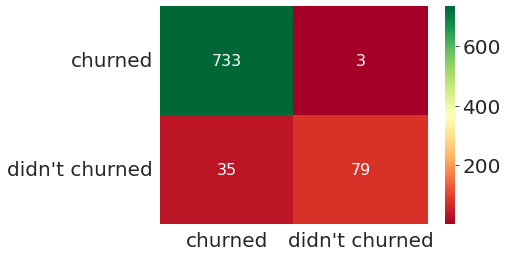

In [499]:
clf = XGBClassifier(random_state=43)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print('Accuracy: ')
print('{}'.format(accuracy_score(y_test, y_pred)))
print('Classification report: ')
print('{}'.format(classification_report(y_test, y_pred)))
print('Confusion Matrix')
print('{}'.format(confusion_matrix(y_test, y_pred)))
print('\n')
clf_cnf = confusion_matrix(y_test, y_pred)
print('True Positives : ',clf_cnf[0][0])
print('False Negatives : ',clf_cnf[0][1])
print('False Positives : ',clf_cnf[1][0])
print('True Negatives : ',clf_cnf[1][1])
print('\n')

labels = ['churned', "didn't churned"]
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='RdYlGn', fmt='d', annot_kws={'size': 16}, xticklabels=labels, yticklabels=labels)

In [500]:
# precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
# print(precision)
# print(recall)
# print(thresholds)
# plt.figure(figsize=(7, 7)) 
# plt.plot(recall, precision)
# plt.xlabel('Recall', fontsize=15) 
# plt.ylabel('Precision', fontsize=15)

ROC_AUC score for the XGBoost model

In [501]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred)
print('roc_auc_score for XGBoost: ', roc_auc_score(y_test, y_pred))

roc_auc_score for XGBoost:  0.8444531845919147


In [502]:
# plt.title('Receiver Operating Characteristic - XGBoost')
# plt.plot(false_positive_rate, true_positive_rate)
# plt.plot([0, 1], ls="--")
# plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()

We can also get the feature importance that XGBoost marked as important during training.

In [503]:
xgb_fea_imp=pd.DataFrame(list(clf.get_booster().get_fscore().items()),
columns=['feature','importance']).sort_values('importance', ascending=False)
print('',xgb_fea_imp)

                           feature  importance
0               total_day_minutes         139
4               total_eve_minutes          85
2              international_plan          79
1   number_customer_service_calls          56
5              total_intl_minutes          54
7             total_night_minutes          41
3                 voice_mail_plan          38
8         TotalIntnlchargePerCall          34
10        TotalNightchargePercall          23
11         TotalEvechargePerCall           19
13          TotalDaychargePerCall          12
12                 account_length          11
9                           state          10
6           number_vmail_messages           6
15                total_day_calls           6
14              total_night_calls           1


In [504]:
xgb_fea_imp['feature'][:2]

0    total_day_minutes
4    total_eve_minutes
Name: feature, dtype: object

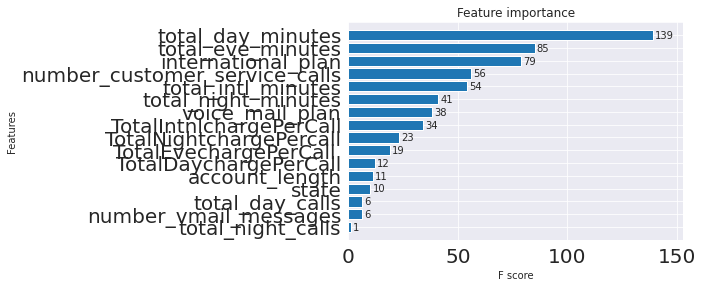

In [505]:
from xgboost import plot_importance
plot_importance(clf, height=0.8)

#### XGBoost Feature selection for best Accuracy

In [506]:
count = 1
accuracy_list = []
for i in range(1, xgb_fea_imp['feature'].size):
  # drop coloumns except top important features -> df.drop[list of features]
  x_train_select = x_train[xgb_fea_imp['feature'][:i]]
  x_test_select = x_test[xgb_fea_imp['feature'][:i]]
  clf.fit(x_train_select, y_train)
  y_pred = clf.predict(x_test_select)
  count = count+1
  # create dataframe with list of accuracies for top N features in XGB
  accuracy = accuracy_score(y_test, y_pred)
  accuracy_list.append(accuracy)
  accuracy_df = pd.DataFrame(accuracy_list,  columns=['Accuracy']).sort_values('Accuracy', ascending=False)

In [507]:
# Get the number of Top features that gave best accuracy
max_value = max(accuracy_list)  # Return the max value of the list.
max_index = accuracy_list. index(max_value) 
# print(max_index)
print('The Top '+ str(max_index+1)+ ' features gave the best accuracy!!')
print('Top '+ str(max_index+1)+ ' features accuracy was '+ str(max_value*100) + '%')
print('\n')
# print('Top '+ str(max_index)+ ' features were :')
# print(feature_importances.index[0],',' ,feature_importances.index[1],',', feature_importances.index[2])

The Top 8 features gave the best accuracy!!
Top 8 features accuracy was 95.88235294117648%




#### XGBoost Hyperparameter tuning

In [530]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [3, 5, 6, 10, 15, 20]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'learning_rate': [0.01, 0.1, 0.2, 0.3],
               'subsample': np.arange(0.5, 1.0, 0.1)
               }
               
print(random_grid)


grid = RandomizedSearchCV(XGBClassifier(), random_grid, verbose=3)
grid.fit(x_train_s, y_train_s)

{'n_estimators': [200, 311, 422, 533, 644, 755, 866, 977, 1088, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [3, 5, 6, 10, 15, 20, None], 'learning_rate': [0.01, 0.1, 0.2, 0.3], 'subsample': array([0.5, 0.6, 0.7, 0.8, 0.9])}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] subsample=0.8999999999999999, n_estimators=1088, max_features=sqrt, max_depth=15, learning_rate=0.01 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=0.8999999999999999, n_estimators=1088, max_features=sqrt, max_depth=15, learning_rate=0.01, score=0.893, total=  18.7s
[CV] subsample=0.8999999999999999, n_estimators=1088, max_features=sqrt, max_depth=15, learning_rate=0.01 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   18.7s remaining:    0.0s


[CV]  subsample=0.8999999999999999, n_estimators=1088, max_features=sqrt, max_depth=15, learning_rate=0.01, score=0.986, total=  23.6s
[CV] subsample=0.8999999999999999, n_estimators=1088, max_features=sqrt, max_depth=15, learning_rate=0.01 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   42.3s remaining:    0.0s


[CV]  subsample=0.8999999999999999, n_estimators=1088, max_features=sqrt, max_depth=15, learning_rate=0.01, score=0.991, total=  23.6s
[CV] subsample=0.8999999999999999, n_estimators=1088, max_features=sqrt, max_depth=15, learning_rate=0.01 
[CV]  subsample=0.8999999999999999, n_estimators=1088, max_features=sqrt, max_depth=15, learning_rate=0.01, score=0.990, total=  23.5s
[CV] subsample=0.8999999999999999, n_estimators=1088, max_features=sqrt, max_depth=15, learning_rate=0.01 
[CV]  subsample=0.8999999999999999, n_estimators=1088, max_features=sqrt, max_depth=15, learning_rate=0.01, score=0.993, total=  23.6s
[CV] subsample=0.7999999999999999, n_estimators=533, max_features=sqrt, max_depth=5, learning_rate=0.3 
[CV]  subsample=0.7999999999999999, n_estimators=533, max_features=sqrt, max_depth=5, learning_rate=0.3, score=0.772, total=   3.3s
[CV] subsample=0.7999999999999999, n_estimators=533, max_features=sqrt, max_depth=5, learning_rate=0.3 
[CV]  subsample=0.7999999999999999, n_est

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  6.7min finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1...
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                     

In [531]:
print(grid.best_params_)

{'subsample': 0.8999999999999999, 'n_estimators': 1088, 'max_features': 'sqrt', 'max_depth': 15, 'learning_rate': 0.01}


Best Hyperparams without SMOTE 



```
'subsample': 0.7999999999999999,
'n_estimators': 866,
'max_features': 'sqrt',
'max_depth': 5,
'learning_rate': 0.01
```
Best Hyperparams with SMOTE 



```
'subsample': 0.8999999999999999, 
'n_estimators': 1088, 
'max_features': 'sqrt', 
'max_depth': 15, 
'learning_rate': 0.01
```




Accuracy: 
0.9564705882352941
Classification report: 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       736
           1       0.96      0.70      0.81       114

    accuracy                           0.96       850
   macro avg       0.96      0.85      0.89       850
weighted avg       0.96      0.96      0.95       850

Confusion Matrix
[[733   3]
 [ 34  80]]


True Positives :  733
False Negatives :  3
False Positives :  34
True Negatives :  80




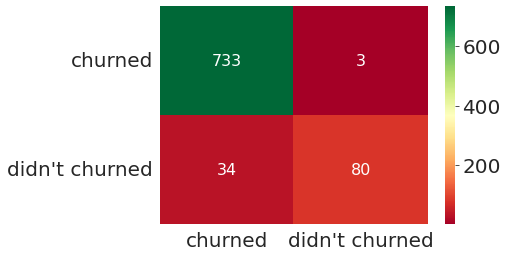

In [533]:
clfXGB = XGBClassifier(subsample= 0.7999999999999999,
                       n_estimators= 866, 
                       max_features= 'sqrt',
                       max_depth= 5, 
                       learning_rate= 0.01,
                       random_state=43)
clfXGB.fit(x_train, y_train)
y_pred = clfXGB.predict(x_test)
print('Accuracy: ')
print('{}'.format(accuracy_score(y_test, y_pred)))
print('Classification report: ')
print('{}'.format(classification_report(y_test, y_pred)))
print('Confusion Matrix')
print('{}'.format(confusion_matrix(y_test, y_pred)))
print('\n')
clf_cnf = confusion_matrix(y_test, y_pred)
print('True Positives : ',clf_cnf[0][0])
print('False Negatives : ',clf_cnf[0][1])
print('False Positives : ',clf_cnf[1][0])
print('True Negatives : ',clf_cnf[1][1])
print('\n')
labels = ['churned', "didn't churned"]
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='RdYlGn', fmt='d', annot_kws={'size': 16}, xticklabels=labels, yticklabels=labels)

ROC_AUC score for the XGBoost optimized model

In [511]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred)
print('roc_auc_score for XGBoost optimized: ', roc_auc_score(y_test, y_pred))

roc_auc_score for XGBoost optimized:  0.8488391495041953


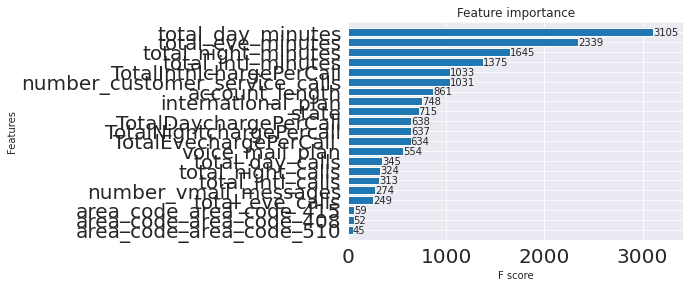

In [512]:
from xgboost import plot_importance
plot_importance(clfXGB, height=0.8)

#### XGB classifier using SMOTE

In [529]:
clfXGB = XGBClassifier(subsample= 0.7999999999999999,
                       n_estimators= 866, 
                       max_features= 'sqrt',
                       max_depth= 5, 
                       learning_rate= 0.01,
                       random_state=43)
clfXGB.fit(x_train_s, y_train_s)
y_pred = clfXGB.predict(x_test)
print('Accuracy: ')
print('{}'.format(accuracy_score(y_test, y_pred)))
print('Classification report: ')
print('{}'.format(classification_report(y_test, y_pred)))
print('Confusion Matrix')
print('{}'.format(confusion_matrix(y_test, y_pred)))
print('\n')
clf_cnf = confusion_matrix(y_test, y_pred)
print('True Positives : ',clf_cnf[0][0])
print('False Negatives : ',clf_cnf[0][1])
print('False Positives : ',clf_cnf[1][0])
print('True Negatives : ',clf_cnf[1][1])
print('\n')

false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred)
print('roc_auc_score for XGBoost optimized: ', roc_auc_score(y_test, y_pred))

Accuracy: 
0.951764705882353
Classification report: 
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       736
           1       0.89      0.73      0.80       114

    accuracy                           0.95       850
   macro avg       0.93      0.86      0.89       850
weighted avg       0.95      0.95      0.95       850

Confusion Matrix
[[726  10]
 [ 31  83]]


True Positives :  726
False Negatives :  10
False Positives :  31
True Negatives :  83


roc_auc_score for XGBoost optimized:  0.8572416094584288


#### 8.3 Set-up the test harness to use 10-Fold cross validation

- We will use stratified **10-fold cross validation** to estimate model accuracy.

- This will split our dataset into 10 parts, train on 9 and test on 1 and repeat for all combinations of train-test splits.

***Stratified*** means that each fold or split of the dataset will aim to have the *same distribution* of example by class as exist in the whole training dataset.

In [513]:
# Spot Check Algorithms
models = []
# models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('RFC_O', RandomForestClassifier(bootstrap= True,
 max_depth= 22,
 random_state = 43,
 max_features= 'sqrt',
 min_samples_leaf= 1,
 min_samples_split= 5,
 n_estimators= 311)))
models.append(('RFC', RandomForestClassifier(random_state=43)))
models.append(('XGB', XGBClassifier(random_state=43)))
models.append(('XGB_O', XGBClassifier(subsample= 0.7999999999999999,
                       n_estimators= 866, 
                       max_features= 'sqrt',
                       max_depth= 5, 
                       learning_rate= 0.01,
                       random_state=43)))
models.append(('SVM', SVC(gamma='auto', random_state=43)))
models.append(('SVM_O', SVC(C= 10, gamma= 0.0001, kernel= 'rbf',random_state=43)))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

RFC_O: 0.955294 (0.014986)
RFC: 0.952353 (0.014154)
XGB: 0.953824 (0.012201)
XGB_O: 0.957059 (0.010206)
SVM: 0.857647 (0.001441)
SVM_O: 0.901765 (0.009684)


#### Performing 10-Fold CV using SMOTE Train dataset

In [514]:
# Spot Check Algorithms
models = []
# models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('RFC_O', RandomForestClassifier(bootstrap= True,
 max_depth= 22,
 random_state = 43,
 max_features= 'sqrt',
 min_samples_leaf= 1,
 min_samples_split= 5,
 n_estimators= 311)))
models.append(('RFC', RandomForestClassifier(random_state=43)))
models.append(('XGB', XGBClassifier(random_state=43)))
models.append(('XGB_O', XGBClassifier(subsample= 0.7999999999999999,
                       n_estimators= 866, 
                       max_features= 'sqrt',
                       max_depth= 5, 
                       learning_rate= 0.01,
                       random_state=43)))
models.append(('SVM', SVC(gamma='auto', random_state=43)))
models.append(('SVM_O', SVC(C= 10, gamma= 0.0001, kernel= 'rbf',random_state=43)))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, x_train_s, y_train_s, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

RFC_O: 0.971708 (0.006956)
RFC: 0.973593 (0.008163)
XGB: 0.959534 (0.006995)
XGB_O: 0.971535 (0.007289)
SVM: 0.758233 (0.011971)
SVM_O: 0.902609 (0.011675)


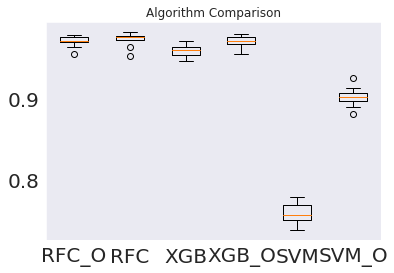

In [515]:
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

#### Using Validation set to evaluate Model performance



*   Ploting Train & Test accuracy for XGBoost and Random Forest Classifier
*   Make predictions using unseen data - We Use the **df_test** dataset as **validation set**



In [518]:
x_train_s

array([[ 37.        ,   3.        ,   0.        , ...,   5.35588018,
          6.63087904,   1.61694915],
       [ 31.        , 129.        ,   0.        , ...,   4.49754902,
         10.96292031,   1.89237288],
       [ 29.        ,  90.        ,   0.        , ...,   5.53458135,
          9.68764355,   0.53944954],
       ...,
       [ 45.26141591, 170.63269939,   0.        , ...,   4.21976029,
          9.0243694 ,   1.35079913],
       [ 35.51054639,  69.38607732,   1.        , ...,   4.69428421,
          8.18741756,   0.76113685],
       [ 13.3822043 , 119.40248992,   1.        , ...,   4.59596697,
          7.98849347,   1.85329081]])

In [520]:
clf = XGBClassifier(subsample= 0.7999999999999999,
                       n_estimators= 866, 
                       max_features= 'sqrt',
                       max_depth= 5, 
                       learning_rate= 0.01,
                       random_state=43)
clf.fit(x_train_s, y_train_s)
# generate predictions on training set
train_pred = clf.predict(x_train_s)
# generate predictions on test set
df_test_set = df_test.drop('id', axis=1)
test_pred = clf.predict(x_test)

# calculate the accuracy of predictions on training dataset
train_acc = metrics.accuracy_score(y_train_s, train_pred)
# calculate the accuracy of predictions on testing dataset
test_acc = metrics.accuracy_score(y_test, test_pred)

print('Accuracy on Train Data: ',train_acc)
print('Accuracy on Test Data: ',test_acc)
# y_pred = clf.predict(df_val_test)
# cv_results = cross_val_score(clf, df_val_test, y_pred, cv=kfold, scoring='accuracy')
# print(cv_results.mean())

Accuracy on Train Data:  0.9849108367626886
Accuracy on Test Data:  0.951764705882353


#### XGBoost Accuracy vs Max Depth

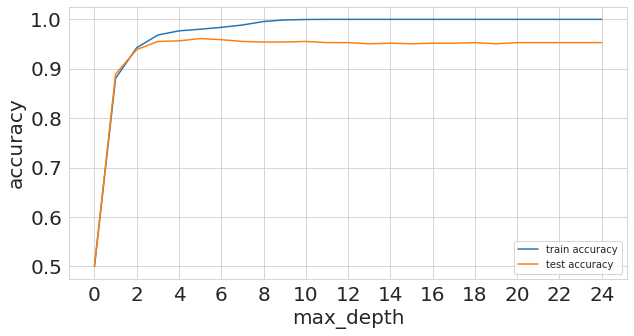

In [326]:
# this is our global size of label text 
# on the plots 
import matplotlib 
matplotlib.rc('xtick', labelsize=20)  
matplotlib.rc('ytick', labelsize=20)  
 
# This line ensures that the plot is displayed 
# inside the notebook 
%matplotlib inline   
 
# initialize lists to store accuracies 
# for training and test data 
# we start with 50% accuracy 
train_accuracies = [0.5] 
test_accuracies = [0.5] 

cols = ['total_day_minutes', 'total_day_charge',
       'number_customer_service_calls', 'international_plan',
       'total_eve_charge', 'total_eve_minutes', 'TotalIntnlchargePerCall',
       'total_intl_minutes', 'total_night_minutes', 'total_intl_charge',
       'voice_mail_plan', 'total_night_charge', 'total_intl_calls',
       'account_length', 'TotalDaychargePerCall', 'TotalNightchargePercall',
       'total_day_calls', 'TotalEvechargePerCall ', 'total_night_calls',
       'state', 'total_eve_calls', 'area_code_area_code_415',
       'area_code_area_code_510', 'area_code_area_code_408']
# iterate over a few depth values 
for depth in range(1, 25): 
    # init the model 
    clf = XGBClassifier(max_depth=depth,random_state=43) 
 
    # fit the model on given features 
    clf.fit(x_train[cols], y_train) 
 
    # create training & test predictions 
    train_predictions = clf.predict(x_train[cols]) 
    test_predictions = clf.predict(x_test[cols]) 
 
    # calculate training & test accuracies 
    train_accuracy = metrics.accuracy_score( 
        y_train, train_predictions 
    ) 
    test_accuracy = metrics.accuracy_score( 
        y_test, test_predictions 
    ) 
     
    # append accuracies 
    train_accuracies.append(train_accuracy) 
    test_accuracies.append(test_accuracy)  


# create two plots using matplotlib 
# and seaborn 
plt.figure(figsize=(10, 5)) 
sns.set_style("whitegrid") 
plt.plot(train_accuracies, label="train accuracy") 
plt.plot(test_accuracies, label="test accuracy") 
plt.legend(loc="lower right", prop={'size': 10}) 
plt.xticks(range(0, 26, 2)) 
plt.xlabel("max_depth", size=20) 
plt.ylabel("accuracy", size=20) 
plt.show() 

#### Random Forest classifier vs Max Depth

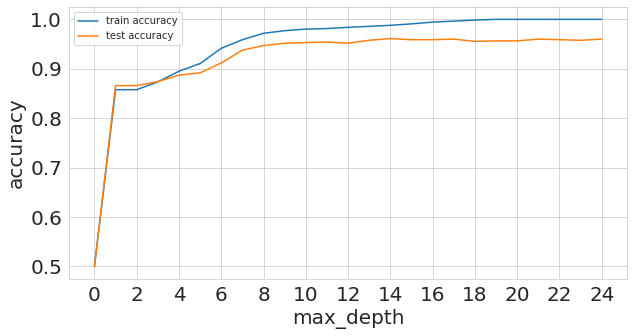

In [99]:
# this is our global size of label text 
# on the plots 
import matplotlib 
matplotlib.rc('xtick', labelsize=20)  
matplotlib.rc('ytick', labelsize=20)  
 
# This line ensures that the plot is displayed 
# inside the notebook 
%matplotlib inline   
 
# initialize lists to store accuracies 
# for training and test data 
# we start with 50% accuracy 
train_accuracies = [0.5] 
test_accuracies = [0.5] 

cols = ['total_day_minutes', 'total_day_charge',
       'number_customer_service_calls', 'international_plan',
       'total_eve_charge', 'total_eve_minutes', 'TotalIntnlchargePerCall',
       'total_intl_minutes', 'total_night_minutes', 'total_intl_charge',
       'voice_mail_plan', 'total_night_charge', 'total_intl_calls',
       'account_length', 'TotalDaychargePerCall', 'TotalNightchargePercall',
       'total_day_calls', 'TotalEvechargePerCall ', 'total_night_calls',
       'state', 'total_eve_calls', 'area_code_area_code_415',
       'area_code_area_code_510', 'area_code_area_code_408']
# iterate over a few depth values 
for depth in range(1, 25): 
    # init the model 
    clf = RandomForestClassifier(max_depth=depth, random_state=43) 
 
    # fit the model on given features 
    clf.fit(x_train[cols], y_train) 
 
    # create training & test predictions 
    train_predictions = clf.predict(x_train[cols]) 
    test_predictions = clf.predict(x_test[cols]) 
 
    # calculate training & test accuracies 
    train_accuracy = metrics.accuracy_score( 
        y_train, train_predictions 
    ) 
    test_accuracy = metrics.accuracy_score( 
        y_test, test_predictions 
    ) 
     
    # append accuracies 
    train_accuracies.append(train_accuracy) 
    test_accuracies.append(test_accuracy)  


# create two plots using matplotlib 
# and seaborn 
plt.figure(figsize=(10, 5)) 
sns.set_style("whitegrid") 
plt.plot(train_accuracies, label="train accuracy") 
plt.plot(test_accuracies, label="test accuracy") 
plt.legend(loc="upper left", prop={'size': 10}) 
plt.xticks(range(0, 26, 2)) 
plt.xlabel("max_depth", size=20) 
plt.ylabel("accuracy", size=20) 
plt.show() 

### 9. Interpretability & Reports


Reference - [SHAP (SHapley Additive exPlanations), a game theoretic approach](https://github.com/slundberg/shap)


To get the importance of feature X{i}

- Get all the subsets of feature S that do not contain x{i}
- Compute the effort on our predictions of adding X{i} to all those subsets

SHAP Tree Explainer API 

1. Create a new explainer, with our model as argument
  ```
  explainer = TreeExplainer(my_tree_model)
  ```


2. Calculate the SHAP values from our model using some observations
```
shap_values = explainer.shap_values(observations)
```

3. Use SHAP visualization functions with our shap_values
```
# Local explaination
shap.force_plot(base_value, shap_values[0] 
# Global feature importance
shap.summary_plot(shap_values)
```


In [100]:
pip install shap

     |████████████████████████████████| 371 kB 5.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for shap: filename=shap-0.40.0-cp37-cp37m-linux_x86_64.whl size=509232 sha256=c6f9f67b6e6177ad9a4fc96682ee61c339cccfc865c9c9808f3ec4d70d958846
  Stored in directory: /root/.cache/pip/wheels/ec/35/84/e304841ac4b910bc95fe9a6e5302eb2507b4333728851dcbfb
Successfully built shap


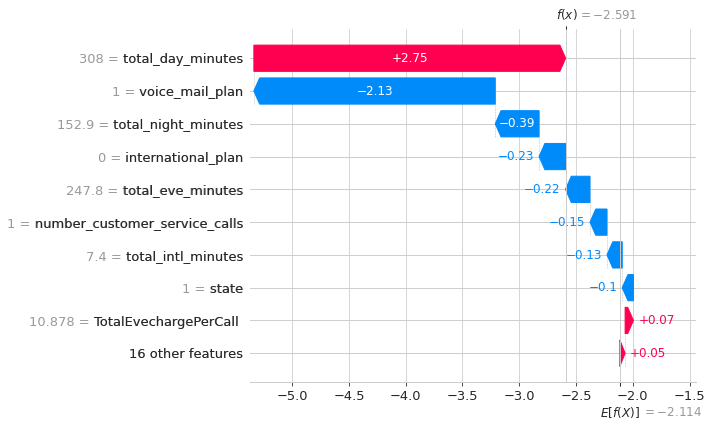

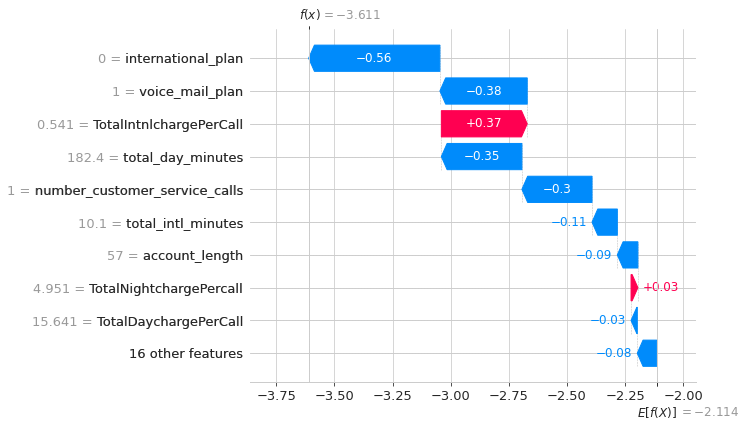

In [101]:
import shap
# train an XGBoost model

clf = XGBClassifier()
clf.fit(x_train, y_train)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(clf)
shap_values = explainer(x_train)

# visualize the first prediction's explanation
# For final outcome of 1 -> churned
shap.plots.waterfall(shap_values[2895])
print('\n')
# For final outcome of 0 -> not churned
shap.plots.waterfall(shap_values[5])

In [102]:
y_train[2895]


1

In [105]:
# y_train[5]

In [106]:
# load JS visualization code to notebook
shap.initjs()

# visualize the first prediction's explanation with a force plot
# For final outcome of 0 -> not churned
shap.plots.force(shap_values[0])



In [107]:
# load JS visualization code to notebook
shap.initjs()
# For final outcome of 1 -> churned
shap.plots.force(shap_values[2895])

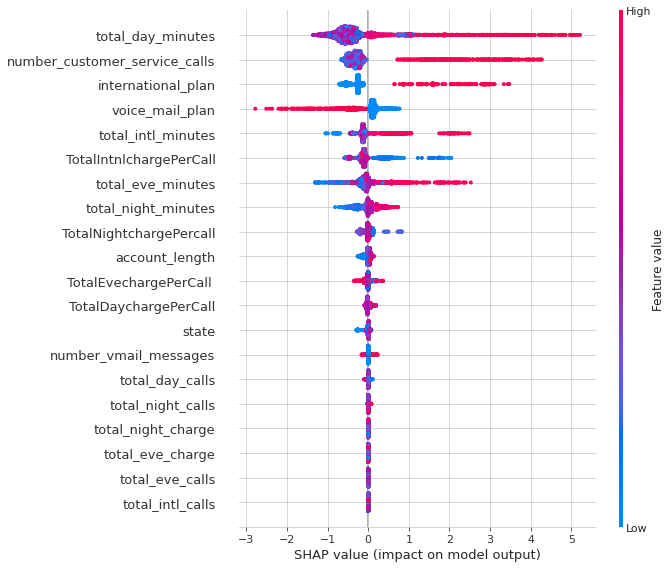

In [108]:
# load JS visualization code to notebook
shap.initjs()
# visualize all the training set predictions
shap.summary_plot(shap_values)

In [109]:
# load JS visualization code to notebook
shap.initjs()
# visualize all the training set predictions
shap.plots.force(shap_values)

shap.plots.force is slow for many thousands of rows, try subsampling your data.


## Submission

#### 1.1 Submitting SVC optimized model results

In [121]:
# Submit for optimized SVC model
clfSVC = SVC(C= 10, gamma= 0.0001, kernel= 'rbf',random_state=43)
clfSVC.fit(x_train,y_train)
df_test_noID = df_test.drop('id', axis=1)
y_pred_sub = clfSVC.predict(df_test_noID)

In [122]:
id_submission_svc = df_test.id
submit_svc = pd.DataFrame({'id':id_submission_svc, 'churn':y_pred_sub})
submit_svc.head()

# replace 0 to no and 1 to yes
submit_svc.churn.replace([0,1],['no','yes'], inplace=True)
submit_svc.to_csv('churn_submit_svc_optimized.csv',index=False)

In [521]:
# Using SMOTE dataset
# Submit for optimized SVC model
clfSVC = SVC(C= 10, gamma= 0.0001, kernel= 'rbf',random_state=43)
clfSVC.fit(x_train_s,y_train_s)
df_test_noID = df_test.drop('id', axis=1)
y_pred_sub = clfSVC.predict(df_test_noID)

id_submission_svc = df_test.id
submit_svc = pd.DataFrame({'id':id_submission_svc, 'churn':y_pred_sub})
submit_svc.head()

# replace 0 to no and 1 to yes
submit_svc.churn.replace([0,1],['no','yes'], inplace=True)
submit_svc.to_csv('churn_submit_svc_optimized_SMOTE.csv',index=False)

#### 1.2 Submitting RFC unoptimized model results

In [123]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
df_test_noID = df_test.drop('id', axis=1)
y_pred_sub = rfc.predict(df_test_noID)

In [124]:
id_submission_rfc = df_test.id
submit_rfc = pd.DataFrame({'id':id_submission_rfc, 'churn':y_pred_sub})
submit_rfc.head()

# replace 0 to no and 1 to yes
submit_rfc.churn.replace([0,1],['no','yes'], inplace=True)
submit_rfc.to_csv('churn_submit_rfc_default.csv',index=False)

In [522]:
# Using SMOTE dataset
rfc = RandomForestClassifier()
rfc.fit(x_train_s, y_train_s)
df_test_noID = df_test.drop('id', axis=1)
y_pred_sub = rfc.predict(df_test_noID)

id_submission_rfc = df_test.id
submit_rfc = pd.DataFrame({'id':id_submission_rfc, 'churn':y_pred_sub})
submit_rfc.head()

# replace 0 to no and 1 to yes
submit_rfc.churn.replace([0,1],['no','yes'], inplace=True)
submit_rfc.to_csv('churn_submit_rfc_default_SMOTE.csv',index=False)

#### 1.3 Submitting RFC optimized model results

In [125]:
rfc_optimized = RandomForestClassifier(bootstrap= True,
 max_depth= 22,
 random_state = 43,
 max_features= 'sqrt',
 min_samples_leaf= 1,
 min_samples_split= 5,
 n_estimators= 311)
rfc_optimized.fit(x_train, y_train)
df_test_noID = df_test.drop('id', axis=1)
y_pred_sub = rfc_optimized.predict(df_test_noID)

In [126]:
id_submission_rfc_optimized = df_test.id
submit_rfc_optimized = pd.DataFrame({'id':id_submission_rfc_optimized, 'churn':y_pred_sub})
submit_rfc_optimized.head()

# replace 0 to no and 1 to yes
submit_rfc_optimized.churn.replace([0,1],['no','yes'], inplace=True)
submit_rfc_optimized.to_csv('churn_submit_rfc_optimized.csv',index=False)

In [523]:
# Using SMOTE dataset
rfc_optimized = RandomForestClassifier(bootstrap= True,
 max_depth= 22,
 random_state = 43,
 max_features= 'sqrt',
 min_samples_leaf= 1,
 min_samples_split= 5,
 n_estimators= 311)
rfc_optimized.fit(x_train_s, y_train_s)
df_test_noID = df_test.drop('id', axis=1)
y_pred_sub = rfc_optimized.predict(df_test_noID)

id_submission_rfc_optimized = df_test.id
submit_rfc_optimized = pd.DataFrame({'id':id_submission_rfc_optimized, 'churn':y_pred_sub})
submit_rfc_optimized.head()

# replace 0 to no and 1 to yes
submit_rfc_optimized.churn.replace([0,1],['no','yes'], inplace=True)
submit_rfc_optimized.to_csv('churn_submit_rfc_optimized_SMOTE.csv',index=False)

#### 1.4 Submitting XGBoost classifier model results

In [127]:
# Submit XGB classifier model
clfXGB = XGBClassifier(random_state=43)
clfXGB.fit(x_train, y_train)
df_test_noID = df_test.drop('id', axis=1)
y_pred_sub = clfXGB.predict(df_test_noID)

In [128]:
id_submission = df_test.id
submit = pd.DataFrame({'id':id_submission, 'churn':y_pred_sub})
submit.head()

id  churn
0   1      0
1   2      0
2   3      1
3   4      0
4   5      0

In [129]:
# replace 0 to no and 1 to yes
submit.churn.replace([0,1],['no','yes'], inplace=True)

In [130]:
submit.to_csv('churn_submit_XGB.csv',index=False)

In [ ]:
#Using Smote
# Submit XGB classifier model
clfXGB = XGBClassifier(random_state=43)
clfXGB.fit(x_train, y_train)
df_test_noID = df_test.drop('id', axis=1)
y_pred_sub = clfXGB.predict(df_test_noID)

id_submission = df_test.id
submit = pd.DataFrame({'id':id_submission, 'churn':y_pred_sub})
submit.head()

# replace 0 to no and 1 to yes
submit.churn.replace([0,1],['no','yes'], inplace=True)

submit.to_csv('churn_submit_XGB_SMOTE.csv',index=False)

#### 1.5 Submitting Optimized XGB classifier

In [331]:
# Submit XGB optimized classifier model
clfXGB_optimized = XGBClassifier(subsample= 0.7999999999999999,
                       n_estimators= 866, 
                       max_features= 'sqrt',
                       max_depth= 5, 
                       learning_rate= 0.01,
                       random_state=43)
clfXGB_optimized.fit(x_train, y_train)
df_test_noID = df_test.drop('id', axis=1)
y_pred_sub = clfXGB_optimized.predict(df_test_noID)

In [332]:
id_submission_XGB_O = df_test.id
submit = pd.DataFrame({'id':id_submission_XGB_O, 'churn':y_pred_sub})
submit.head()

id  churn
0   1      0
1   2      0
2   3      1
3   4      0
4   5      0

In [333]:
# replace 0 to no and 1 to yes
submit.churn.replace([0,1],['no','yes'], inplace=True)

In [334]:
submit.to_csv('churn_submit_XGB_optimized.csv',index=False)

In [525]:
# Using SMOTE
# Submit XGB optimized classifier model
clfXGB_optimized = XGBClassifier(subsample= 0.7999999999999999,
                       n_estimators= 866, 
                       max_features= 'sqrt',
                       max_depth= 5, 
                       learning_rate= 0.01,
                       random_state=43)
clfXGB_optimized.fit(x_train_s, y_train_s)
df_test_noID = df_test.drop('id', axis=1)
y_pred_sub = clfXGB_optimized.predict(df_test_noID)

id_submission_XGB_O = df_test.id
submit = pd.DataFrame({'id':id_submission_XGB_O, 'churn':y_pred_sub})
submit.head()

# replace 0 to no and 1 to yes
submit.churn.replace([0,1],['no','yes'], inplace=True)

submit.to_csv('churn_submit_XGB_optimized_SMOTE.csv',index=False)

## Conclusion

The initial Exploratory Data analysis of data using Pandas Profiling and matplotlib, It was observed that features like - 

*number of customer care calls, international plan, total day minutes, total day charge, total eve charge, total international calls, total international minutes and voice mail plan*

these were interpreted to be significant to predict the Churn Target variable. Upon training the XGBoost optimized model on train data and using its feature importance metrics into consideration, the Top features that resulted in the best accuracy of 0.9632 were - 

- total day minutes
- total eve minutes
- total international charge per call
- total international minutes
- Number of customer care calls
- International plan
- Voice mail plan

As we can see, our initial analysis through EDA was almost accurate to decide which features were significant and which were not.

Summary of the results in tabulated form below - 

RFC_O: 0.971708 (0.006956)

RFC: 0.973593 (0.008163)

XGB: 0.959534 (0.006995)

XGB_O: 0.971535 (0.007289)

SVM: 0.758233 (0.011971)

SVM_O: 0.902609 (0.011675

In [538]:
# importing the modules
from IPython.display import display
import pandas as pd
  
# creating a DataFrame
dict = {'Classifier Model Name' : ['SVC(Optimized)', 'Random Forest', 'Random Forest(Optimized)', 'XGBoost', 'XGBoost(Optimized)'],
        'K-Fold Cross Validation Score' : [0.901765, 0.952353, 0.955294, 0.953824, 0.957059],
        'K-Fold Cross Validation Score(SMOTE)' : [0.902609, 0.973593, 0.971708, 0.959534, 0.9715],
        'Accuracy(%)' : [86.941, 95.884, 96.111, 95.529, 95.647],
        'ROC_AUC Score': [0.6737, 0.8576, 0.86267, 0.8444, 0.8488],
        'Kaggle Score': [0.8888, 0.9644, 0.9688, 0.9511, 0.96],
        'Kaggle Private Leaderboard': [22,11,12,16,13]}
df = pd.DataFrame(dict)
  
# displaying the DataFrame
display(df.sort_values('Accuracy(%)', ascending=False))

Classifier Model Name  ...  Kaggle Private Leaderboard
2  Random Forest(Optimized)  ...                          12
1             Random Forest  ...                          11
4        XGBoost(Optimized)  ...                          13
3                   XGBoost  ...                          16
0            SVC(Optimized)  ...                          22

[5 rows x 7 columns]

## Contribution Statements 📔

### what I did that was different than the public kernels:

1. Used Support vector classifier, Random forest classifier and XGBoost and found the best parameters for the model by Hyperparameter tuning using GridSearchCV/RandomizedSearchCV.
2. For **Feature selection** relied on the **Feature Importance** metric - **Gini Importance**, that models like Random forest classifier and XGBoost had.
3. Ran a **script to iterate throught the important feature** array and result in - **what top N features gave the best accuracy** for the model.
4. Used **Stratified K-Fold** cross validation to determine the expected baseline accuracy for the 3 classifiers.
5. Focused on **Interpretability** of the XGBoost selected model using **SHAPley Values** and plot Waterfall, Force and summary plots for the same to understand the marginal contribution of each independent variable to push the prediction of target at 0 or 1.



## Licensing & Citation 📰

`Copyright 2021 Kshitij Zutshi`
```
Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

  http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.
```


Citation Reference -

https://www.kaggle.com/dileepsahu/customer-churn-prediction-with-96-44-accuracy

https://www.kaggle.com/nickrusso978/churn-prediction#Random-Forest-Classification-is-providing-the-best-accuracy-with-a-score-93%

https://www.kaggle.com/jsaguiar/churn-prediction-tutorial-with-sklearn

https://www.kaggle.com/raywilliam/customer-churn-prediction-xgboost-hyperbandcv